## 운전자 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
import os

from wordcloud import WordCloud
from konlpy.tag import Twitter
from ckonlpy.tag import Twitter
from collections import Counter
from PIL import Image


%matplotlib inline
plt.rc('font', family='Malgun Gothic')

In [2]:
os.getcwd()

'C:\\Users\\user'

In [3]:
# 파일 불러오기
df_운전자 = pd.read_excel('차량운전자_정리_결측제거.xlsx') 
print(df_운전자.shape)
print(df_운전자.columns)
df_운전자.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '차량운전자_정리_결측제거.xlsx'

In [5]:
df_운전자 = pd.read_excel("C:/Users/user/Desktop/플젝용_데이터/설문조사/차량운전자_정리_결측제거.xlsx")

In [8]:
df_운전자.columns 
df_운전자.shape

(154, 25)

In [9]:
# 컬럼명 변경 
df_운전자.columns = ['작성일시', '성별','연령', '주이용차종', '면허취득기간', '실제운전기간','1주일 운전횟수', '1년평균주행거리','운전목적','PM사고', 'PM사고횟수', 'PM사고원인', 'PM사고위치', 'PM아차사고', 'PM아차사고횟수', 'PM아차사고원인', 'PM아차사고위치', 'PM이용도로','PM이용도로_이유', 'PM개선사항', 'PM전용도로찬/반', '전용도로찬/반_이유', '전용도로위치', '전용도로위치_이유','추가의견']
df_운전자.head(2)

,작성일시,성별,연령,주이용차종,면허취득기간,실제운전기간,1주일 운전횟수,1년평균주행거리,운전목적,PM사고,...,PM아차사고원인,PM아차사고위치,PM이용도로,PM이용도로_이유,PM개선사항,PM전용도로찬/반,전용도로찬/반_이유,전용도로위치,전용도로위치_이유,추가의견
0,2021-12-06 16:12:11,남자,27,승용차(10인이하),7,1.0,3~4회,1만km 미만,출퇴근용,아니오,...,전동킥보드 사용자,차도,차도,인도로 다니기에는 속도가 빨라서 위험하다.,"2, 7",찬성,따로 구분되어 있어야 한다고 생각합니다.,차도,속도가 있기 때문에,NaN
1,2021-12-07 23:48:17.787000,남자,24,승용차(10인이하),5,5.0,1~2회,1만km 미만,여가·취미,아니오,...,전동킥보드 사용자,차도,자전거 전용도로,안전문제,NaN,반대,도로도 너무 좁다,보도(인도),차도는 더 줄이기 힘든 곳이 많다,PM사용 운전자도 교통 규율을 잘지키도록


### 데이터 전처리

* 오프라인 설문 입력한 값들은 숫자로 되어있어서, 숫자에 해당하는 항목으로 바꿔주는 작업 진행함 (map 함수 사용)
* null 값 제거 및 범주화 진행

<AxesSubplot:>

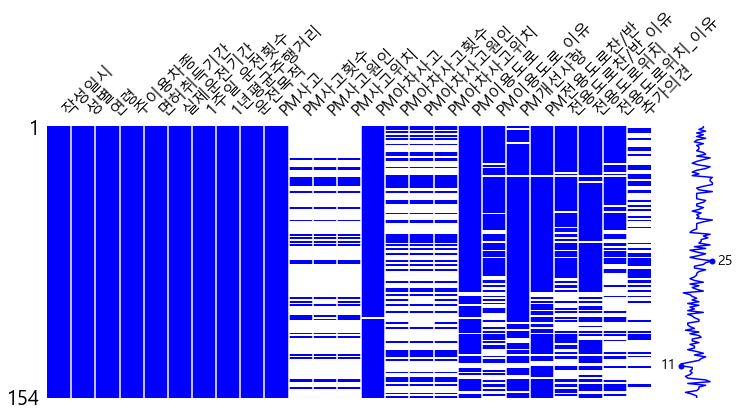

In [10]:
#설문 응답/미응답 시각화
import missingno as msno

#NAN값 시각화
msno.matrix(df_운전자, figsize=(12,5), color=(0,0,1)) #color = rgb

In [11]:
#성별 전처리
df_운전자['성별'].unique()

array(['남자', '여자', 1, 2], dtype=object)

In [12]:
mapping = {1: '남자',
           2: '여자',
           '남자': '남자',
           '여자': '여자'}
df_운전자['성별'] = df_운전자['성별'].map(mapping)

In [13]:
df_운전자['성별'].value_counts()

남자    139
여자     15
Name: 성별, dtype: int64

In [14]:
#연령 : 범주화하여 전처리 진행 (10대 ~ 80대)
df_운전자['연령'].unique()

array([27, 24, 26, 36, 30, 29, 25, 34, 38, 32, 31, 80, 75, 76, 82, 78, 79,
       60, 40, 65, 42, 61, 18, 46, 52, 63, 49, 50, 47, 44, 39, 48, 41, 35,
       57, 51, 45, 23, 28, 68, 62, 77, 84, 86, 58, 64, 59, 67, 22, 69, 20],
      dtype=int64)

In [15]:
#주이용차종 전처리
df_운전자['주이용차종'].unique()

array(['승용차(10인이하)', '승합차(11인이상)', 2, 1, 5, 4, 3, 6], dtype=object)

In [16]:
df_운전자['주이용차종']

0      승용차(10인이하)
1      승용차(10인이하)
2      승용차(10인이하)
3      승용차(10인이하)
4      승용차(10인이하)
          ...    
149             2
150             4
151             4
152             2
153             2
Name: 주이용차종, Length: 154, dtype: object

In [17]:
mapping = {1 : '이륜차(원동기)',
           2 : '승용차(10인이하)', 
           3 : '승합차(11인이상)',
           4 : '화물차',
           5 : '버스',
           6 : '기타',
           '승용차(10인이하)':'승용차(10인이하)',
           '승합차(11인이상)':'승합차(11인이상)'}
df_운전자['주이용차종'] = df_운전자['주이용차종'].map(mapping)

In [18]:
df_운전자['주이용차종']

0      승용차(10인이하)
1      승용차(10인이하)
2      승용차(10인이하)
3      승용차(10인이하)
4      승용차(10인이하)
          ...    
149    승용차(10인이하)
150           화물차
151           화물차
152    승용차(10인이하)
153    승용차(10인이하)
Name: 주이용차종, Length: 154, dtype: object

In [19]:
df_운전자['주이용차종'].unique()

array(['승용차(10인이하)', '승합차(11인이상)', '이륜차(원동기)', '버스', '화물차', '기타'],
      dtype=object)

In [20]:
#면허취득기간 : 추후 분류 예정
df_운전자['면허취득기간'].unique()

array([ 7,  5,  4,  6,  3, 15, 10,  9, 20,  8, 12, 13, 46, 33, 25, 40, 35,
       32, 53, 16, 30, 24,  1, 28, 27, 26, 11, 21, 23, 22, 43, 42, 36, 17,
       51, 19, 38, 34], dtype=int64)

In [21]:
df_운전자['면허취득기간'].value_counts()

20    14
5     12
10    11
30     9
25     8
6      7
33     6
9      6
35     5
40     5
27     5
3      5
8      5
21     4
26     4
1      4
15     4
28     3
16     3
53     3
23     3
43     3
42     3
17     2
22     2
7      2
24     2
13     2
12     2
4      2
11     1
32     1
46     1
36     1
51     1
19     1
38     1
34     1
Name: 면허취득기간, dtype: int64

In [22]:
df_운전자['면허취득기간'] = df_운전자['면허취득기간'].astype('int')

In [23]:
df_운전자['실제운전기간'].unique()

array([ 1. ,  5. ,  2. ,  4. , 10. ,  3. , 12. ,  6. , 11. ,  7. , 40. ,
       33. , 25. , 36. , 35. , 20. , 30. , 50. , 16. , 15. , 22. , 24. ,
       27. , 26. ,  9. ,  8. , 23. ,  0.5, 39. , 42. , 53. , 43. , 21. ,
       13. , 34. , 17. ])

In [24]:
df_운전자['실제운전기간'].value_counts()

20.0    16
30.0    13
25.0    12
5.0     12
1.0      8
10.0     8
3.0      8
35.0     8
27.0     5
15.0     4
16.0     4
40.0     4
7.0      4
6.0      4
2.0      4
26.0     3
23.0     3
8.0      3
22.0     3
9.0      3
21.0     2
53.0     2
0.5      2
33.0     2
4.0      2
12.0     2
50.0     2
11.0     2
36.0     2
24.0     1
39.0     1
42.0     1
43.0     1
13.0     1
34.0     1
17.0     1
Name: 실제운전기간, dtype: int64

In [25]:
#1주일 운전횟수
df_운전자['1주일 운전횟수'].unique()

array(['3~4회', '1~2회', '5~6회', '매일', '1회 미만', 3, 5, 2, 4, 1], dtype=object)

In [26]:
mapping = {1: '1회 미만',
           2: '1~2회',
           3: '3~4회',
           4: '5~6회',
           5: '매일',
           '1~2회': '1~2회',
           '3~4회': '3~4회',
           '5~6회': '5~6회',
           '매일': '매일',
           '1회 미만':'1회 미만'}
df_운전자['1주일 운전횟수'] = df_운전자['1주일 운전횟수'].map(mapping)

In [27]:
df_운전자['1주일 운전횟수'].unique()

array(['3~4회', '1~2회', '5~6회', '매일', '1회 미만'], dtype=object)

In [28]:
df_운전자['1주일 운전횟수'].value_counts()

매일       79
3~4회     29
5~6회     25
1~2회     17
1회 미만     4
Name: 1주일 운전횟수, dtype: int64

In [29]:
#1년평균주행거리
df_운전자['1년평균주행거리'].unique()

array(['1만km 미만', '1만~2만km', '2만~3만km', 1, 2, 4, 3, 5, 6], dtype=object)

In [30]:
mapping = {1: '1만km 미만',
           2: '1만~2만km',
           3: '2만~3만km',
           4: '3만~4만km',
           5: '4만~5만km',
           6: '5만km 이상',
           '1만km 미만':'1만km 미만',
           '1만~2만km':'1만~2만km',
           '2만~3만km':'2만~3만km'}
df_운전자['1년평균주행거리'] = df_운전자['1년평균주행거리'].map(mapping)

In [31]:
df_운전자['1년평균주행거리'].value_counts()

1만km 미만    53
1만~2만km    40
2만~3만km    31
5만km 이상    14
3만~4만km    11
4만~5만km     5
Name: 1년평균주행거리, dtype: int64

In [32]:
# 운전목적
df_운전자['운전목적'].unique()

array(['출퇴근용', '여가·취미', '지인 방문', '쇼핑', '출장', 5, 7, 3, 1, 2, 6, 4],
      dtype=object)

In [33]:
mapping = {1: '출퇴근용',
           2: '여객·화물운수용',
           3: '업무용',
           4: '쇼핑',
           5: '여가·취미',
           6: '지인 방문',
           7: '기타',
           '출퇴근용':'출퇴근용',
           '여가·취미':'여가·취미',
           '지인 방문':'지인 방문',
           '쇼핑':'쇼핑',
           '출장':'기타'}
df_운전자['운전목적'] = df_운전자['운전목적'].map(mapping)

In [34]:
df_운전자['운전목적'].value_counts()

출퇴근용        69
업무용         39
여가·취미       15
기타          14
여객·화물운수용    10
지인 방문        5
쇼핑           2
Name: 운전목적, dtype: int64

In [35]:
# PM사고
df_운전자['PM사고'].unique()

array(['아니오', '예', 2, 1], dtype=object)

In [36]:
mapping = {'아니오': '아니오',
           '예' : '예',
           1: '예',
           2: '아니오'}
df_운전자['PM사고'] = df_운전자['PM사고'].map(mapping)

In [37]:
df_운전자['PM사고'].unique()

array(['아니오', '예'], dtype=object)

In [38]:
df_운전자['PM사고'].value_counts()

아니오    124
예       30
Name: PM사고, dtype: int64

In [39]:
# PM사고횟수 : 일단 분류안함
df_운전자['PM사고횟수'].unique()

array([nan,  1.,  2.,  3.,  6.,  0.])

In [40]:
# PM사고원인
df_운전자['PM사고원인'].unique()

array([nan, '전동킥보드 사용자', 2, 4, 5, 6, 1, 3], dtype=object)

In [41]:
mapping = {'전동킥보드 사용자': '전동킥보드 사용자',
           1: '보행자',
           2: '자전거 운전자',
           3: '전동킥보드 사용자',
           4: '자동차 운전자',
           5: '주정차 차량',
           6: '도로 상태 요인(시설물 혹은 노면 상태 불량 등)'}
df_운전자['PM사고원인'] = df_운전자['PM사고원인'].map(mapping)

In [42]:
df_운전자['PM사고원인'].unique()

array([nan, '전동킥보드 사용자', '자전거 운전자', '자동차 운전자', '주정차 차량',
       '도로 상태 요인(시설물 혹은 노면 상태 불량 등)', '보행자'], dtype=object)

In [43]:
df_운전자['PM사고원인'].value_counts()

자동차 운전자                        13
전동킥보드 사용자                       4
자전거 운전자                         3
주정차 차량                          3
도로 상태 요인(시설물 혹은 노면 상태 불량 등)     3
보행자                             2
Name: PM사고원인, dtype: int64

In [44]:
# PM사고위치
df_운전자['PM사고위치'].unique()

array([nan,  1.,  4.,  2.])

In [45]:
mapping = {1: '차도',
           2: '이면도로(골목길)',
           3: '자전거 전용차로(도로의 가장자리에 있는 자전거 도로)',
           4: '기타'}
df_운전자['PM사고위치'] = df_운전자['PM사고위치'].map(mapping)

In [46]:
df_운전자['PM사고위치'].unique()

array([nan, '차도', '기타', '이면도로(골목길)'], dtype=object)

In [47]:
df_운전자['PM사고위치'].value_counts()

차도           15
이면도로(골목길)     8
기타            7
Name: PM사고위치, dtype: int64

In [48]:
# PM아차사고
df_운전자['PM아차사고'].unique()

array(['예', '아니오', 2, 1, nan], dtype=object)

In [49]:
mapping = {'아니오': '아니오',
           '예' : '예',
           1: '예',
           2: '아니오'}
df_운전자['PM아차사고'] = df_운전자['PM아차사고'].map(mapping)

In [50]:
df_운전자['PM아차사고'].value_counts()

아니오    96
예      57
Name: PM아차사고, dtype: int64

In [51]:
# PM아차사고횟수 : 추후 분류 예정
df_운전자['PM아차사고횟수'].unique()

array([ 1.,  2., nan,  4.,  3.,  5.,  6., 10.])

In [52]:
df_운전자['PM아차사고횟수'].value_counts()

2.0     20
1.0     18
3.0      8
4.0      6
5.0      2
6.0      2
10.0     1
Name: PM아차사고횟수, dtype: int64

In [53]:
#PM아차사고원인
df_운전자['PM아차사고원인'].unique()

array(['전동킥보드 사용자', nan, '자전거 운전자', 4, 5, 2, 6, 3, 1], dtype=object)

In [54]:
mapping = {'전동킥보드 사용자': '전동킥보드 사용자',
           '자전거 운전자' : '자전거 운전자',
           1: '보행자',
           2: '자전거 운전자',
           3: '전동킥보드 사용자',
           4: '자동차 운전자',
           5: '주정차 차량',
           6: '도로 상태 요인(시설물 혹은 노면 상태 불량 등)'}
df_운전자['PM아차사고원인'] = df_운전자['PM아차사고원인'].map(mapping)

In [55]:
df_운전자['PM아차사고원인'].value_counts()

전동킥보드 사용자                      22
자동차 운전자                        15
자전거 운전자                         8
주정차 차량                          6
도로 상태 요인(시설물 혹은 노면 상태 불량 등)     3
보행자                             1
Name: PM아차사고원인, dtype: int64

In [56]:
#PM아차사고위치
df_운전자['PM아차사고위치'].unique()

array(['차도', nan, '이면도로(골목길)', 1, 4, 2, 3], dtype=object)

In [57]:
mapping = {1: '차도',
           2: '이면도로(골목길)',
           3: '자전거 전용도로(도로의 가장자리에 있는 자전거 도로)',
           4: '기타',
           '차도' : '차도',
           '이면도로(골목길)': '이면도로(골목길)'}
df_운전자['PM아차사고위치'] = df_운전자['PM아차사고위치'].map(mapping)

In [58]:
df_운전자['PM아차사고위치'].value_counts()

차도                               28
이면도로(골목길)                        21
기타                                5
자전거 전용도로(도로의 가장자리에 있는 자전거 도로)     3
Name: PM아차사고위치, dtype: int64

In [59]:
#PM주이용도로
df_운전자['PM이용도로'].unique()

array(['차도', '자전거 전용도로', '보도(인도)', '이면도로(골목길)', 5, 4, 1, 2, 3, nan],
      dtype=object)

In [60]:
mapping = {1: '보도(인도)',
           2: '차도',
           3: '이면도로(골목길)',
           4: '자전거 전용도로',
           5: '기타',
           '차도': '차도',
           '자전거 전용도로':'자전거 전용도로',
           '보도(인도)': '보도(인도)',
           '이면도로(골목길)': '이면도로(골목길)'}
df_운전자['PM이용도로'] = df_운전자['PM이용도로'].map(mapping)

In [61]:
df_운전자['PM이용도로'].unique()

array(['차도', '자전거 전용도로', '보도(인도)', '이면도로(골목길)', '기타', nan], dtype=object)

In [62]:
df_운전자['PM이용도로'].value_counts()

자전거 전용도로     63
보도(인도)       34
차도           23
기타           13
이면도로(골목길)     7
Name: PM이용도로, dtype: int64

In [63]:
#PM개선사항 : 엑셀에서 한글로 된 부분 전부 숫자로 변환함.
# 숫자 분리하여 개수세기 진행
df_운전자['PM개선사항'].unique()
## PM개선사항에서 'nan'값만 제거 : 리스트에서 nan값 제거
mylist = [str(x) for x in df_운전자['PM개선사항']]
print(mylist)
PM개선사항_결측제거 = [x for x in mylist if x != 'nan']
print(PM개선사항_결측제거)


['2, 7', 'nan', '2, 6', '1, 2', '1, 2', '1, 5', '1, 2', '7, 2', '2, 3', 'nan', '1, 3', '1, 2', '2, 3', '1, 2', '1, 2', '1, 3', '5, 7', '2, 4', '1, 3', '2, 3', '1, 2', '1,2', '3,4', '2,3', '1,2', '2,7', '2,7', '1,2', 'nan', '1,2', '1,4', '2,3', '1,2', '2,7', '1,2', '2,3', '1,4', '3,4', '2,4', '1,2', '2,7', '2,5', '1,2', '1,2', '2,3', '2,6', '2,7', '1,2', '2,4', '2,3', '1,2', '1,2', '1,2', '1,2', '1,2', '1,2', '2,7', '1,2', '2,5', '2,4', '2,3', '2,7', '2,3', '2,4', '1,2', '1,2', '3,8', '1,3', '2,5', '2,3', '2,6', '1,2', '3,7', '2,6', '2,8', '1,2', '2,4', '2,5', '2,7', '1,2', '1,2', '1,3', '2,7', '2,7', '1,2', '2,3', '2,7', '2,3', '1,2', '1,4', '3,4', '2,4', '1,4', '1,7', '1,2', '2,6', '2,5', '3,4', '2,6', '1,2', '2,4', '1,2', '1,2', '2,7', '1,3', '2,6', '2,5', '2,7', '2,6', '2,6', '1,2', 'nan', '1,3', '1,6', '1,2', 'nan', '1,2', '1,2', '1,3', '3,7', 'nan', 'nan', 'nan', '1,2', '1,2', '2,5', 'nan', '2,6', '4,7', 'nan', '6,7', '4,5', '2,3', '1,4', 'nan', 'nan', 'nan', '1,2', '2,6', '1,2', 

In [64]:
## PM개선사항에서 'nan'값만 제거 : 리스트에서 nan값 제거
mylist = [str(x) for x in df_운전자['PM개선사항']]
print(mylist)
PM개선사항_결측제거 = [x for x in mylist if x != 'nan']
print(PM개선사항_결측제거)

['2, 7', 'nan', '2, 6', '1, 2', '1, 2', '1, 5', '1, 2', '7, 2', '2, 3', 'nan', '1, 3', '1, 2', '2, 3', '1, 2', '1, 2', '1, 3', '5, 7', '2, 4', '1, 3', '2, 3', '1, 2', '1,2', '3,4', '2,3', '1,2', '2,7', '2,7', '1,2', 'nan', '1,2', '1,4', '2,3', '1,2', '2,7', '1,2', '2,3', '1,4', '3,4', '2,4', '1,2', '2,7', '2,5', '1,2', '1,2', '2,3', '2,6', '2,7', '1,2', '2,4', '2,3', '1,2', '1,2', '1,2', '1,2', '1,2', '1,2', '2,7', '1,2', '2,5', '2,4', '2,3', '2,7', '2,3', '2,4', '1,2', '1,2', '3,8', '1,3', '2,5', '2,3', '2,6', '1,2', '3,7', '2,6', '2,8', '1,2', '2,4', '2,5', '2,7', '1,2', '1,2', '1,3', '2,7', '2,7', '1,2', '2,3', '2,7', '2,3', '1,2', '1,4', '3,4', '2,4', '1,4', '1,7', '1,2', '2,6', '2,5', '3,4', '2,6', '1,2', '2,4', '1,2', '1,2', '2,7', '1,3', '2,6', '2,5', '2,7', '2,6', '2,6', '1,2', 'nan', '1,3', '1,6', '1,2', 'nan', '1,2', '1,2', '1,3', '3,7', 'nan', 'nan', 'nan', '1,2', '1,2', '2,5', 'nan', '2,6', '4,7', 'nan', '6,7', '4,5', '2,3', '1,4', 'nan', 'nan', 'nan', '1,2', '2,6', '1,2', 

In [65]:
PM개선사항_결측제거

['2, 7',
 '2, 6',
 '1, 2',
 '1, 2',
 '1, 5',
 '1, 2',
 '7, 2',
 '2, 3',
 '1, 3',
 '1, 2',
 '2, 3',
 '1, 2',
 '1, 2',
 '1, 3',
 '5, 7',
 '2, 4',
 '1, 3',
 '2, 3',
 '1, 2',
 '1,2',
 '3,4',
 '2,3',
 '1,2',
 '2,7',
 '2,7',
 '1,2',
 '1,2',
 '1,4',
 '2,3',
 '1,2',
 '2,7',
 '1,2',
 '2,3',
 '1,4',
 '3,4',
 '2,4',
 '1,2',
 '2,7',
 '2,5',
 '1,2',
 '1,2',
 '2,3',
 '2,6',
 '2,7',
 '1,2',
 '2,4',
 '2,3',
 '1,2',
 '1,2',
 '1,2',
 '1,2',
 '1,2',
 '1,2',
 '2,7',
 '1,2',
 '2,5',
 '2,4',
 '2,3',
 '2,7',
 '2,3',
 '2,4',
 '1,2',
 '1,2',
 '3,8',
 '1,3',
 '2,5',
 '2,3',
 '2,6',
 '1,2',
 '3,7',
 '2,6',
 '2,8',
 '1,2',
 '2,4',
 '2,5',
 '2,7',
 '1,2',
 '1,2',
 '1,3',
 '2,7',
 '2,7',
 '1,2',
 '2,3',
 '2,7',
 '2,3',
 '1,2',
 '1,4',
 '3,4',
 '2,4',
 '1,4',
 '1,7',
 '1,2',
 '2,6',
 '2,5',
 '3,4',
 '2,6',
 '1,2',
 '2,4',
 '1,2',
 '1,2',
 '2,7',
 '1,3',
 '2,6',
 '2,5',
 '2,7',
 '2,6',
 '2,6',
 '1,2',
 '1,3',
 '1,6',
 '1,2',
 '1,2',
 '1,2',
 '1,3',
 '3,7',
 '1,2',
 '1,2',
 '2,5',
 '2,6',
 '4,7',
 '6,7',
 '4,5',
 '2,3

In [66]:
PM개선사항_결측제거= pd.DataFrame(PM개선사항_결측제거).reset_index()
PM개선사항 = pd.DataFrame(PM개선사항_결측제거[0].apply(lambda x : x.split(",")[0]))
PM개선사항.columns = ['항목']
PM개선사항 = pd.DataFrame(PM개선사항['항목'].value_counts()).reset_index()
PM개선사항
PM개선사항1 = pd.DataFrame(PM개선사항_결측제거[0].apply(lambda x : x.split(",")[1]))
PM개선사항1
PM개선사항1.columns = ['항목']
PM개선사항1 = pd.DataFrame(PM개선사항1['항목'].value_counts()).reset_index()
df_pm개선사항 = pd.merge(PM개선사항, PM개선사항1, how = 'outer', on='index')
df_pm개선사항 = df_pm개선사항.fillna(0) 
df_pm개선사항['합계'] = df_pm개선사항['항목_x'] + df_pm개선사항['항목_y']
df_pm개선사항
df_pm개선사항['index'] = df_pm개선사항['index'].str.strip()
개선사항 = pd.DataFrame(df_pm개선사항.groupby('index')['합계'].sum()).reset_index()
개선사항
개선사항.loc[개선사항['index'] == '1', 'index'] = '사고시 보험문제 개선'
개선사항.loc[개선사항['index'] == '2', 'index'] = '도로/보도 환경 개선'
개선사항.loc[개선사항['index'] == '3', 'index'] = '운영방식 개선'
개선사항.loc[개선사항['index'] == '4', 'index'] = '편리성 증대'
개선사항.loc[개선사항['index'] == '5', 'index'] = 'PM 장비개선'
개선사항.loc[개선사항['index'] == '6', 'index'] = '대중교통 환승 연계'
개선사항.loc[개선사항['index'] == '7', 'index'] = '법 제도 개선'
개선사항.loc[개선사항['index'] == '8', 'index'] = '기타'
개선사항

,index,합계
0,사고시 보험문제 개선,66.0
1,도로/보도 환경 개선,107.0
2,운영방식 개선,33.0
3,편리성 증대,20.0
4,PM 장비개선,11.0
5,대중교통 환승 연계,15.0
6,법 제도 개선,22.0
7,기타,2.0


In [67]:
PM개선사항 = pd.DataFrame(PM개선사항_결측제거[0].apply(lambda x : x.split(",")[0]))

In [68]:
PM개선사항.columns = ['항목']

In [69]:
PM개선사항 = pd.DataFrame(PM개선사항['항목'].value_counts()).reset_index()
PM개선사항

,index,항목
0,1,66
1,2,59
2,3,8
3,4,2
4,7,1
5,5,1
6,6,1


In [70]:
PM개선사항1 = pd.DataFrame(PM개선사항_결측제거[0].apply(lambda x : x.split(",")[1]))
PM개선사항1

,0
0,7
1,6
2,2
3,2
4,5
...,...
133,3
134,5
135,3
136,2


In [71]:
PM개선사항1.columns = ['항목']

In [72]:
PM개선사항1 = pd.DataFrame(PM개선사항1['항목'].value_counts()).reset_index()
df_pm개선사항 = pd.merge(PM개선사항, PM개선사항1, how = 'outer', on='index')
df_pm개선사항 = df_pm개선사항.fillna(0) 
df_pm개선사항['합계'] = df_pm개선사항['항목_x'] + df_pm개선사항['항목_y']
df_pm개선사항

,index,항목_x,항목_y,합계
0,1,66.0,0.0,66.0
1,2,59.0,40.0,99.0
2,3,8.0,19.0,27.0
3,4,2.0,17.0,19.0
4,7,1.0,19.0,20.0
5,5,1.0,9.0,10.0
6,6,1.0,13.0,14.0
7,2,0.0,8.0,8.0
8,3,0.0,6.0,6.0
9,7,0.0,2.0,2.0


In [73]:
df_pm개선사항 = pd.merge(PM개선사항, PM개선사항1, how = 'outer', on='index')
df_pm개선사항 = df_pm개선사항.fillna(0) 
df_pm개선사항['합계'] = df_pm개선사항['항목_x'] + df_pm개선사항['항목_y']
df_pm개선사항

,index,항목_x,항목_y,합계
0,1,66.0,0.0,66.0
1,2,59.0,40.0,99.0
2,3,8.0,19.0,27.0
3,4,2.0,17.0,19.0
4,7,1.0,19.0,20.0
5,5,1.0,9.0,10.0
6,6,1.0,13.0,14.0
7,2,0.0,8.0,8.0
8,3,0.0,6.0,6.0
9,7,0.0,2.0,2.0


In [74]:
df_pm개선사항['index'] = df_pm개선사항['index'].str.strip()
개선사항 = pd.DataFrame(df_pm개선사항.groupby('index')['합계'].sum()).reset_index()
개선사항
개선사항.loc[개선사항['index'] == '1', 'index'] = '사고시 보험문제 개선'
개선사항.loc[개선사항['index'] == '2', 'index'] = '도로/보도 환경 개선'
개선사항.loc[개선사항['index'] == '3', 'index'] = '운영방식 개선'
개선사항.loc[개선사항['index'] == '4', 'index'] = '편리성 증대'
개선사항.loc[개선사항['index'] == '5', 'index'] = 'PM 장비개선'
개선사항.loc[개선사항['index'] == '6', 'index'] = '대중교통 환승 연계'
개선사항.loc[개선사항['index'] == '7', 'index'] = '법 제도 개선'
개선사항.loc[개선사항['index'] == '8', 'index'] = '기타'
개선사항

,index,합계
0,사고시 보험문제 개선,66.0
1,도로/보도 환경 개선,107.0
2,운영방식 개선,33.0
3,편리성 증대,20.0
4,PM 장비개선,11.0
5,대중교통 환승 연계,15.0
6,법 제도 개선,22.0
7,기타,2.0


In [75]:
개선사항.loc[개선사항['index'] == '1', 'index'] = '사고시 보험문제 개선'
개선사항.loc[개선사항['index'] == '2', 'index'] = '도로/보도 환경 개선'
개선사항.loc[개선사항['index'] == '3', 'index'] = '운영방식 개선'
개선사항.loc[개선사항['index'] == '4', 'index'] = '편리성 증대'
개선사항.loc[개선사항['index'] == '5', 'index'] = 'PM 장비개선'
개선사항.loc[개선사항['index'] == '6', 'index'] = '대중교통 환승 연계'
개선사항.loc[개선사항['index'] == '7', 'index'] = '법 제도 개선'
개선사항.loc[개선사항['index'] == '8', 'index'] = '기타'
개선사항

,index,합계
0,사고시 보험문제 개선,66.0
1,도로/보도 환경 개선,107.0
2,운영방식 개선,33.0
3,편리성 증대,20.0
4,PM 장비개선,11.0
5,대중교통 환승 연계,15.0
6,법 제도 개선,22.0
7,기타,2.0


In [76]:
#PM전용도로찬/반
df_운전자['PM전용도로찬/반'].unique()

array(['찬성', '반대', 1, 2, 3, nan], dtype=object)

In [77]:
mapping = {1: '찬성',
           2: '반대',
           3: '잘 모르겠다',
           '찬성': '찬성',
           '반대': '반대'}
df_운전자['PM전용도로찬/반'] = df_운전자['PM전용도로찬/반'].map(mapping)

In [78]:
df_운전자['PM전용도로찬/반'].value_counts()

찬성        100
반대         33
잘 모르겠다      5
Name: PM전용도로찬/반, dtype: int64

In [79]:
df_운전자['전용도로위치'].unique()

array(['차도', '보도(인도)', 3, 1, 2, nan], dtype=object)

In [80]:
mapping = {1: '보도(인도)',
           2: '차도',
           3: '기타',
           '보도(인도)': '보도(인도)',
           '차도' : '차도'}
df_운전자['전용도로위치'] = df_운전자['전용도로위치'].map(mapping)

### 문항별 빈도분석

### 1. 운전자 인적사항
#### 1-1. 귀하의 성별은?

In [81]:
df_운전자['빈도 수'] = 1
df_운전자['빈도 수']

0      1
1      1
2      1
3      1
4      1
      ..
149    1
150    1
151    1
152    1
153    1
Name: 빈도 수, Length: 154, dtype: int64

In [82]:
#성별 빈도수 시각화 준비
운전자_성별 = pd.DataFrame(df_운전자.groupby('성별')['빈도 수'].count())
운전자_성별['비율'] = (운전자_성별['빈도 수']/sum(df_운전자['빈도 수'].value_counts())) * 100
운전자_성별

,빈도 수,비율
성별,,
남자,139,90.25974
여자,15,9.74026


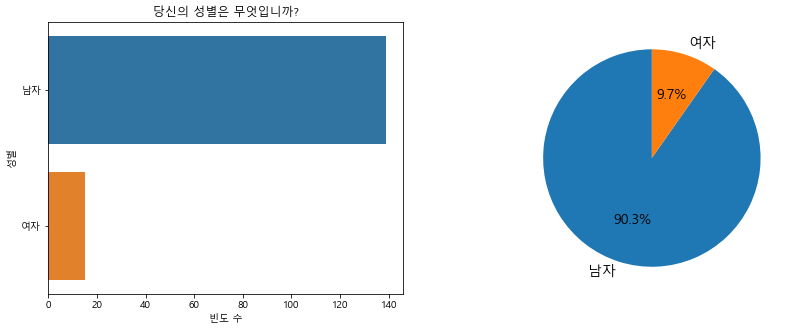

In [83]:
#성별 빈도수 시각화
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = '빈도 수', y = 운전자_성별.index, data = 운전자_성별)
ax1.set_title('당신의 성별은 무엇입니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(운전자_성별['비율'], labels = 운전자_성별.index,
                  autopct = '%1.1f%%', textprops = {'fontsize' : 14},
                  shadow = False, startangle = 90)
plt.show()

* 남자 139명, 여자 15명이 운전자 설문에 응답하였음.
* 운전자 설문은 남자 90.3%, 여자 9.7% 가 응답하였음. 

#### 1-2. 귀하의 연령은?

In [88]:
df_운전자['연령'].describe()

count    154.000000
mean      46.818182
std       19.627397
min       10.000000
25%       30.000000
50%       40.000000
75%       70.000000
max       80.000000
Name: 연령, dtype: float64

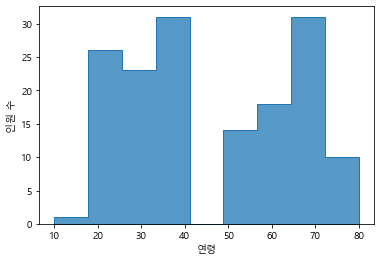

In [89]:
sns.histplot(df_운전자['연령'], element = 'step')
plt.xlabel('연령')
plt.ylabel('인원 수')
plt.show()

In [90]:
df_운전자.loc[(df_운전자['연령'] >= 10) & (df_운전자['연령'] <= 19),'연령'] = 10
df_운전자.loc[(df_운전자['연령'] >= 20) & (df_운전자['연령'] <= 29),'연령'] = 20
df_운전자.loc[(df_운전자['연령'] >= 30) & (df_운전자['연령'] <= 39),'연령'] = 30
df_운전자.loc[(df_운전자['연령'] >= 40) & (df_운전자['연령'] <= 49),'연령'] = 40
df_운전자.loc[(df_운전자['연령'] >= 50) & (df_운전자['연령'] <= 59),'연령'] = 50
df_운전자.loc[(df_운전자['연령'] >= 60) & (df_운전자['연령'] <= 69),'연령'] = 60
df_운전자.loc[(df_운전자['연령'] >= 70) & (df_운전자['연령'] <= 79),'연령'] = 70
df_운전자.loc[(df_운전자['연령'] >= 80) & (df_운전자['연령'] <= 89),'연령'] = 80
df_운전자.loc[(df_운전자['연령'] >= 90) & (df_운전자['연령'] <= 99),'연령'] = 90

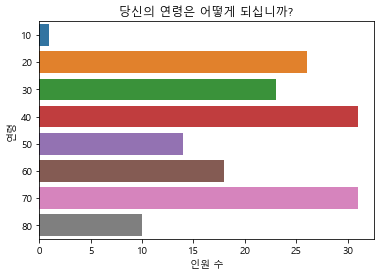

In [91]:
#연령 빈도 시각화
sns.countplot(y ='연령', data = df_운전자)
plt.xlabel('인원 수')
plt.title('당신의 연령은 어떻게 되십니까?')
plt.show()

* 운전자 설문 응답자의 연령은 평균 51세, 최소 18세, 최대 86세로 확인되었음. (나이는 만 나이를 기준으로 함)

#### 1-3. 귀하께서 직접 운전하는 차종은 무엇입니까?

In [92]:
df_운전자['주이용차종'].describe()

count            154
unique             6
top       승용차(10인이하)
freq             115
Name: 주이용차종, dtype: object

In [93]:
주이용차종 = pd.DataFrame(df_운전자.groupby('주이용차종')['빈도 수'].count())
주이용차종 = 주이용차종.sort_values(by = '빈도 수', ascending = False)
주이용차종

,빈도 수
주이용차종,
승용차(10인이하),115
이륜차(원동기),13
화물차,13
승합차(11인이상),7
버스,5
기타,1


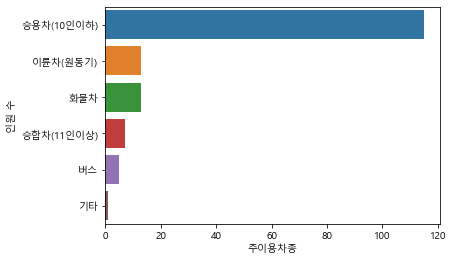

In [94]:
#주 이용차종 빈도 시각화
sns.barplot(x= '빈도 수', y = 주이용차종.index, data = 주이용차종)
plt.xlabel('주이용차종')
plt.ylabel('인원 수')
plt.show()

* 운전자 설문 응답자 중 대부분이 승용차(10인 이하) 차종을 운전하는 것으로 확인되었음.

#### 1-4. 귀하께서 면허를 취득하신지 몇 년이 되셨습니까? 

In [95]:
df_운전자['면허취득기간'].describe()

count    154.000000
mean      20.201299
std       12.929866
min        1.000000
25%        9.000000
50%       20.000000
75%       30.000000
max       53.000000
Name: 면허취득기간, dtype: float64

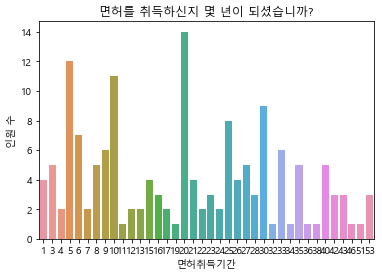

In [96]:
#면허 취득기간 시각화 #히스토그램으로 그려도 됌
sns.countplot(x= '면허취득기간', data = df_운전자)
plt.ylabel('인원 수')
plt.title('면허를 취득하신지 몇 년이 되셨습니까?')
plt.show()

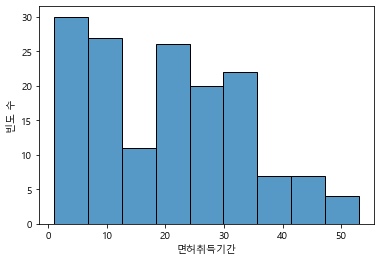

In [97]:
sns.histplot(df_운전자['면허취득기간'])
plt.ylabel('빈도 수') 
plt.show()

* 운전자 설문 응답자의 면허취득기간은 평균 20년, 최소 1년, 최대 53년으로 확인되었음.

#### 1-5. 귀하께서 면허 취득 후 실제로 운전을 하신지 몇 년이 되셨습니까?

In [98]:
df_운전자['실제운전기간'].describe()

count    154.000000
mean      18.558442
std       12.915885
min        0.500000
25%        6.000000
50%       20.000000
75%       27.000000
max       53.000000
Name: 실제운전기간, dtype: float64

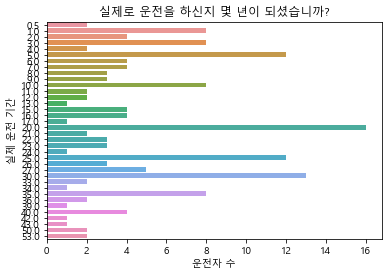

In [99]:
#실제운전기간 빈도 시각화
sns.countplot(y = '실제운전기간', data = df_운전자)
plt.xlabel('운전자 수')
plt.ylabel('실제 운전 기간')
plt.title('실제로 운전을 하신지 몇 년이 되셨습니까?')
plt.show()

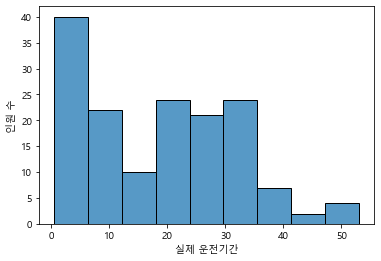

In [100]:
sns.histplot(df_운전자['실제운전기간'])
plt.xlabel('실제 운전기간')
plt.ylabel('인원 수')
plt.show()

* 운전자 설문 응답자의 실제 운전기간은 평균값 18년, 최소 운전기간 0.5년, 최대 운전기간은 53년으로 확인되었음. 

In [101]:
df_운전자.loc[(df_운전자['실제운전기간'] >= 0) & (df_운전자['실제운전기간'] < 10),'실운전기간'] = '0~10년'
df_운전자.loc[(df_운전자['실제운전기간'] >= 10) & (df_운전자['실제운전기간'] < 20),'실운전기간'] = '10~20년'
df_운전자.loc[(df_운전자['실제운전기간'] >= 20) & (df_운전자['실제운전기간'] < 30),'실운전기간'] = '20~30년'
df_운전자.loc[(df_운전자['실제운전기간'] >= 30) & (df_운전자['실제운전기간'] < 40),'실운전기간'] = '30~40년'
df_운전자.loc[(df_운전자['실제운전기간'] >= 40) & (df_운전자['실제운전기간'] < 50),'실운전기간'] = '40~50년'
df_운전자.loc[(df_운전자['실제운전기간'] >= 50) & (df_운전자['실제운전기간'] < 60),'실운전기간'] = '50~60년'
df_운전자[['실운전기간','PM사고경험']]

KeyError: "['PM사고경험'] not in index"

In [102]:
운전기간사고경험 = df_운전자.groupby('실운전기간')[['PM사고경험']].sum()
운전기간사고경험 = 운전기간사고경험.reset_index()

sns.barplot(x = 운전기간사고경험['실운전기간'], y = 운전기간사고경험['PM사고경험'])
plt.title('실제 운전기간별 PM사고 경험 수')
plt.xlabel('실제 운전기간')
plt.ylabel('PM사고경험 빈도 수')
plt.show()

KeyError: "Columns not found: 'PM사고경험'"

#### 1-6. 귀하는 일주일에 며칠을 운전하십니까?

In [103]:
주당운전횟수 = pd.DataFrame(df_운전자.groupby('1주일 운전횟수')['빈도 수'].count())
주당운전횟수['비율'] = 주당운전횟수['빈도 수']/sum(주당운전횟수['빈도 수']) * 100
주당운전횟수 = 주당운전횟수.sort_values(by = '빈도 수', ascending = False)
주당운전횟수

,빈도 수,비율
1주일 운전횟수,,
매일,79,51.298701
3~4회,29,18.831169
5~6회,25,16.233766
1~2회,17,11.038961
1회 미만,4,2.597403


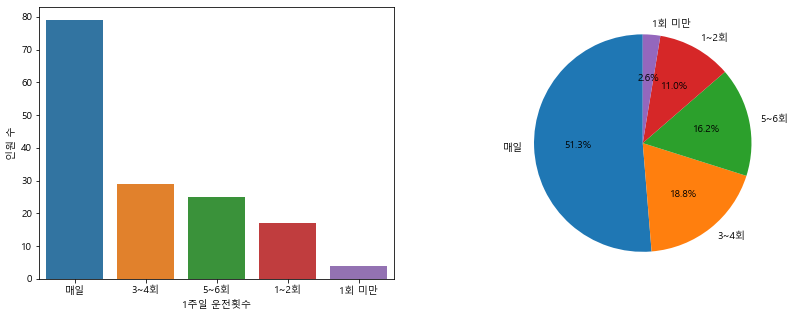

In [104]:
#1주일 운전횟수
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = 주당운전횟수.index ,y = 주당운전횟수['빈도 수'], data = 주당운전횟수)
plt.xlabel('1주일 운전횟수')
plt.ylabel('인원 수')


ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(주당운전횟수['비율'], labels = 주당운전횟수.index,
                  autopct = '%1.1f%%', startangle = 90)

plt.show()

* 운전자 설문 응답자 중 매일 운전하는 사람의 비율이 51.3%로 가장 높게 나타남.

#### 1-7. 귀하의 1년 평균 주행거리는 대략 얼마입니까?

In [105]:
연평균주행 = pd.DataFrame(df_운전자.groupby('1년평균주행거리')['빈도 수'].count())
연평균주행['비율'] = 연평균주행['빈도 수']/ sum(연평균주행['빈도 수']) * 100
연평균주행

,빈도 수,비율
1년평균주행거리,,
1만km 미만,53,34.415584
1만~2만km,40,25.974026
2만~3만km,31,20.129870
3만~4만km,11,7.142857
4만~5만km,5,3.246753
5만km 이상,14,9.090909


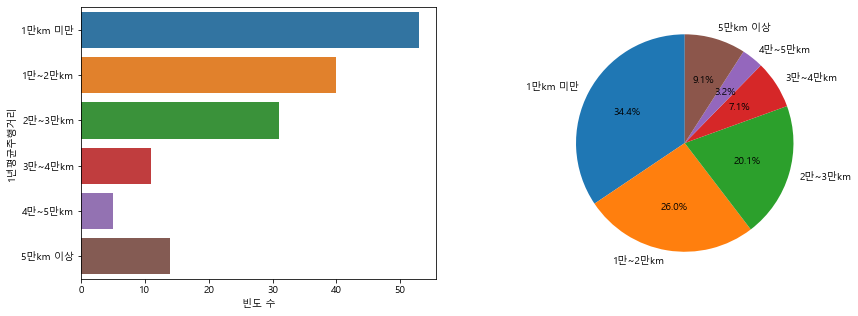

In [106]:
#1년평균주행거리 시각화
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = '빈도 수', y = 연평균주행.index, data = 연평균주행)

#histplot, distplot은 숫자 데이터만 가능 #plt.pie / pie 쓰기 전에 비율 계산 해야함.
ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(연평균주행['비율'], labels = 연평균주행.index,
                  autopct = '%1.1f%%', startangle = 90)

* 평균주행거리 1만km미만의 운전자가 가장 많은 것으로 확인되었음

#### 1-8. 귀하께서 주로 운전하시는 이유는 무엇입니까?

In [107]:
운전목적 = pd.DataFrame(df_운전자.groupby('운전목적')['빈도 수'].count())
운전목적['비율'] = 운전목적['빈도 수']/ sum(운전목적['빈도 수']) * 100
운전목적 = 운전목적.sort_values(by = '빈도 수', ascending = False)
운전목적

,빈도 수,비율
운전목적,,
출퇴근용,69,44.805195
업무용,39,25.324675
여가·취미,15,9.740260
기타,14,9.090909
여객·화물운수용,10,6.493506
지인 방문,5,3.246753
쇼핑,2,1.298701


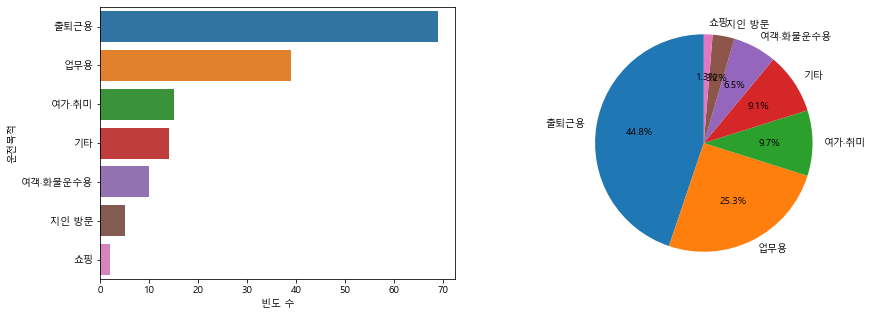

In [108]:
#운전 목적 시각화
fig = plt.figure(figsize =(14,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = '빈도 수', y = 운전목적.index, data = 운전목적)
plt.xlabel('빈도 수')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(운전목적['비율'], labels = 운전목적.index,
                  autopct = '%1.1f%%', startangle = 90)

* 운전자 응답자의 운전목적으로 출퇴근 44.8% , 업무용 25.3% 으로 높게 확인되었음.

### 2. PM(개인형 이동수단) 사고 관련 문항
#### 2-1. 운전 중에, PM(개인형 이동수단)과 사고가 난 경험이 있습니까?

In [109]:
PM사고 = pd.DataFrame(df_운전자.groupby('PM사고')['빈도 수'].count())
PM사고['비율'] = PM사고['빈도 수']/ sum(PM사고['빈도 수']) * 100
PM사고

,빈도 수,비율
PM사고,,
아니오,124,80.519481
예,30,19.480519


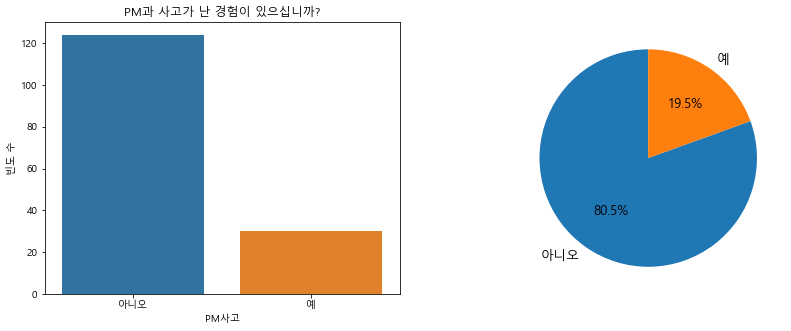

In [110]:
#PM사고
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x= PM사고.index ,y = '빈도 수', data = PM사고)
plt.ylabel('빈도 수')
plt.title('PM과 사고가 난 경험이 있으십니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(PM사고['비율'], labels = PM사고.index,
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)

plt.show()

#### 2-2. 운전 중에, PM(개인형 이동수단)과 사고가 난 경험은 몇 번 정도입니까?

<AxesSubplot:xlabel='PM사고횟수', ylabel='Count'>

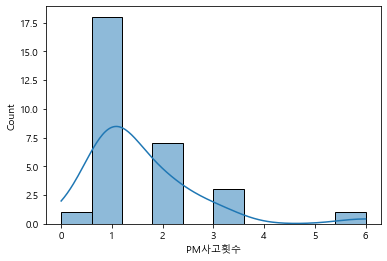

In [111]:
# PM사고횟수 히스토그램
sns.histplot(df_운전자['PM사고횟수'], kde = True)

In [112]:
#PM사고횟수
사고횟수 = pd.DataFrame(df_운전자.groupby('PM사고횟수')['빈도 수'].count())
사고횟수 = 사고횟수.sort_values(by = '빈도 수', ascending = False)
사고횟수

,빈도 수
PM사고횟수,
1.0,18
2.0,7
3.0,3
0.0,1
6.0,1


In [113]:
df_운전자['PM사고횟수']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
149   NaN
150   NaN
151   NaN
152   NaN
153   NaN
Name: PM사고횟수, Length: 154, dtype: float64

In [114]:
df_운전자['PM사고횟수'].notnull().sum() #결측치 갯수 확인

30

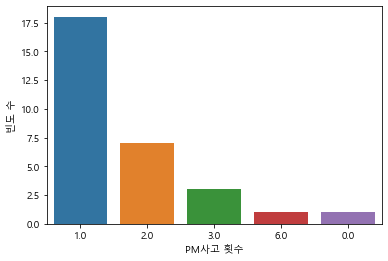

In [115]:
#PM사고횟수 시각화
sns.barplot(x = 사고횟수.index, y = '빈도 수', data = 사고횟수, order = df_운전자['PM사고횟수'].value_counts().index)
plt.xlabel('PM사고 횟수')
plt.show()

* 운전자 중 PM사고 횟수를 1회 경험한 인원이 가장 높게 나타남.

#### 2-3. 운전 중에, PM(개인형 이동수단)과 충돌이나 사고를 유발한 상대 혹은 원인은 무엇입니까?

In [116]:
#PM사고원인
PM사고원인 =  pd.DataFrame(df_운전자.groupby('PM사고원인')['빈도 수'].count())
PM사고원인 = PM사고원인.sort_values(by = '빈도 수', ascending = False)
PM사고원인['비율'] = PM사고원인['빈도 수'] / sum(PM사고원인['빈도 수']) * 100
PM사고원인

,빈도 수,비율
PM사고원인,,
자동차 운전자,13,46.428571
전동킥보드 사용자,4,14.285714
도로 상태 요인(시설물 혹은 노면 상태 불량 등),3,10.714286
자전거 운전자,3,10.714286
주정차 차량,3,10.714286
보행자,2,7.142857


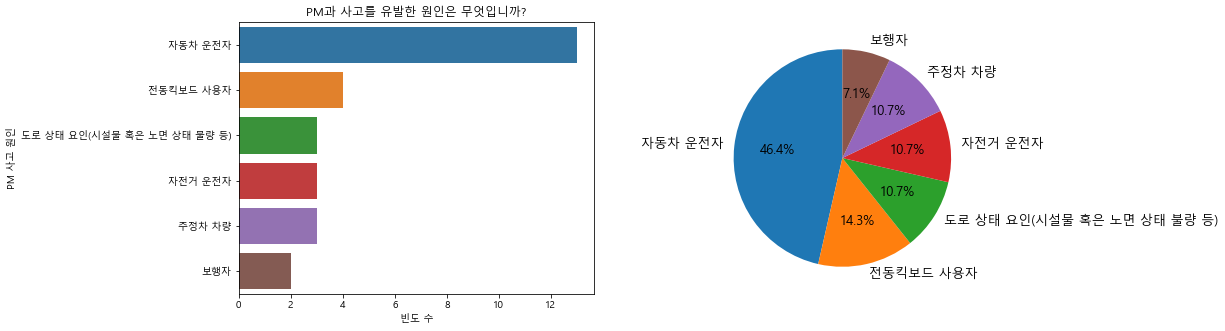

In [117]:
fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = '빈도 수' , y = PM사고원인.index, data = PM사고원인)
plt.xlabel('빈도 수')
plt.ylabel('PM 사고 원인')
plt.title('PM과 사고를 유발한 원인은 무엇입니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(PM사고원인['비율'], labels = PM사고원인.index,
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)

plt.show()

* PM사고를 유발한 원인은 자동차 운전자가 13건으로 가장 높게 나타남.
* PM사고 수가 적어서 충분하지 않음

#### 2-4. 운전 중에, PM(개인형 이동수단)과 사고가 난 위치는 어디입니까?

In [118]:
df_운전자['PM사고위치']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
149    NaN
150    NaN
151    NaN
152    NaN
153    NaN
Name: PM사고위치, Length: 154, dtype: object

In [119]:
#PM사고위치 : pie차트 시도 예정
PM사고위치 = pd.DataFrame(df_운전자.groupby('PM사고위치')['빈도 수'].count())
PM사고위치 = PM사고위치.sort_values(by = '빈도 수', ascending = False)
PM사고위치['비율'] = PM사고위치['빈도 수']/ sum(PM사고위치['빈도 수']) * 100
PM사고위치

,빈도 수,비율
PM사고위치,,
차도,15,50.000000
이면도로(골목길),8,26.666667
기타,7,23.333333


In [120]:
df_운전자['PM사고위치'].notnull().sum() #null값이 아닌 유효값

30

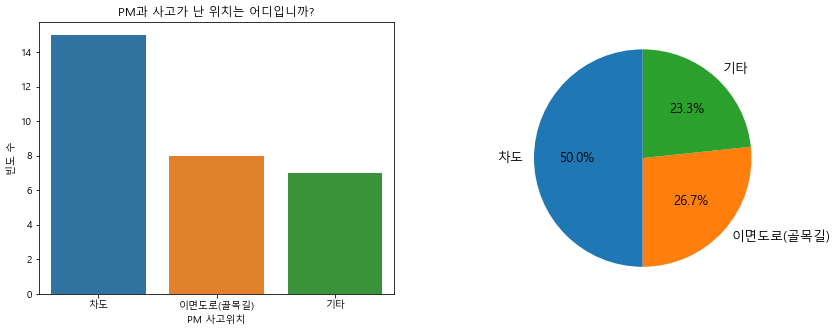

In [121]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = PM사고위치.index, y = '빈도 수', data = PM사고위치)
plt.xlabel('PM 사고위치')
plt.ylabel('빈도 수')
plt.title('PM과 사고가 난 위치는 어디입니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(PM사고위치['비율'],labels = PM사고위치.index,
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)
plt.show()

* PM 사고 위치는 차도 50%, 이면도로(골목길) 26.7%, 기타 23.3%로 확인되었음.

#### 2-5. 운전 중에, PM(개인형 이동수단)과 사고가 날 뻔한 경험이 있습니까?

In [122]:
#PM아차사고 : bar 차트 추가 예정
PM아차사고 = pd.DataFrame(df_운전자.groupby('PM아차사고')['빈도 수'].count())
PM아차사고 = PM아차사고.sort_values(by = '빈도 수', ascending = False)
PM아차사고['비율'] = PM아차사고['빈도 수'] / sum(PM아차사고['빈도 수']) * 100
PM아차사고

,빈도 수,비율
PM아차사고,,
아니오,96,62.745098
예,57,37.254902


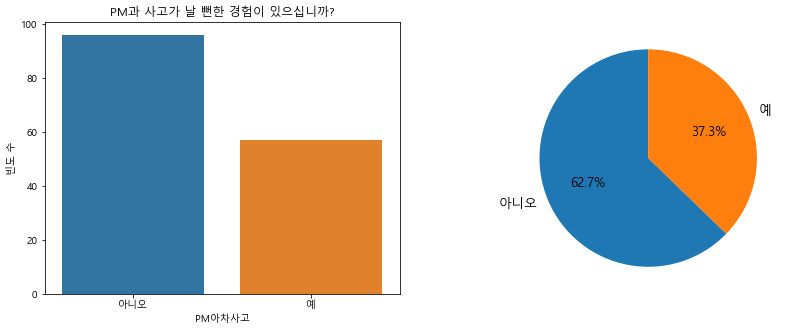

In [123]:
fig = plt.figure(figsize =(14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x= PM아차사고.index, y = '빈도 수', data = PM아차사고)
plt.ylabel('빈도 수')
plt.title('PM과 사고가 날 뻔한 경험이 있으십니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(PM아차사고['비율'], labels = PM아차사고.index,
             autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)
plt.show()

* 운전자 중 PM과 사고가 날 뻔한 경험이 있는 운전자는 37.3%로 확인되었음.

#### 2-6. 운전 중에, PM(개인형 이동수단)과 사고가 날 뻔한 경험은 몇 번 정도입니까?

<AxesSubplot:xlabel='PM아차사고횟수', ylabel='Count'>

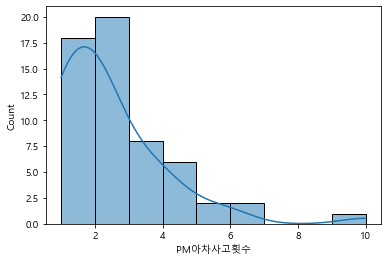

In [124]:
#PM 아차사고횟수 히스토그램
sns.histplot(df_운전자['PM아차사고횟수'], kde = True)

In [125]:
#PM아차사고횟수
PM아차사고횟수 = pd.DataFrame(df_운전자.groupby('PM아차사고횟수')['빈도 수'].count())
PM아차사고횟수['비율'] = PM아차사고횟수['빈도 수'] / sum(PM아차사고횟수['빈도 수']) * 100
PM아차사고횟수 = PM아차사고횟수.sort_values(by = '빈도 수', ascending = False)
PM아차사고횟수

,빈도 수,비율
PM아차사고횟수,,
2.0,20,35.087719
1.0,18,31.578947
3.0,8,14.035088
4.0,6,10.526316
5.0,2,3.508772
6.0,2,3.508772
10.0,1,1.754386


In [126]:
PM아차사고횟수.index

Float64Index([2.0, 1.0, 3.0, 4.0, 5.0, 6.0, 10.0], dtype='float64', name='PM아차사고횟수')

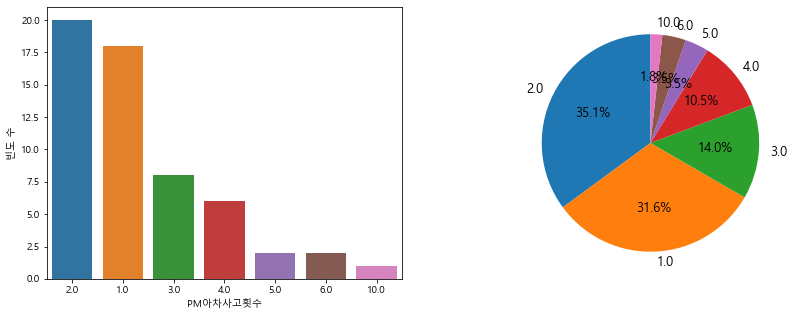

In [127]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = PM아차사고횟수.index, y = '빈도 수', data = PM아차사고횟수, order = PM아차사고횟수.index)
plt.ylabel('빈도 수')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(PM아차사고횟수['비율'], labels = PM아차사고횟수.index,
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)
plt.show()

* PM과 사고가 날뻔한 경험은 2회가 35.1%로 가장 많은 비율을 차지하였음.

In [128]:
df_운전자['PM아차사고횟수'].notnull().sum()

57

#### 2-7. 운전 중에, PM(개인형 이동수단)과 충돌이나 사고를 유발할 뻔한 상대 혹은 원인은 무엇입니까?

In [129]:
df_운전자['PM아차사고원인'].notnull().sum()

55

In [130]:
PM아차사고원인 = pd.DataFrame(df_운전자.groupby('PM아차사고원인')['빈도 수'].count())
PM아차사고원인 = PM아차사고원인.sort_values(by = '빈도 수', ascending = False)
PM아차사고원인['비율'] = PM아차사고원인['빈도 수'] / sum(PM아차사고원인['빈도 수']) * 100
PM아차사고원인

,빈도 수,비율
PM아차사고원인,,
전동킥보드 사용자,22,40.000000
자동차 운전자,15,27.272727
자전거 운전자,8,14.545455
주정차 차량,6,10.909091
도로 상태 요인(시설물 혹은 노면 상태 불량 등),3,5.454545
보행자,1,1.818182


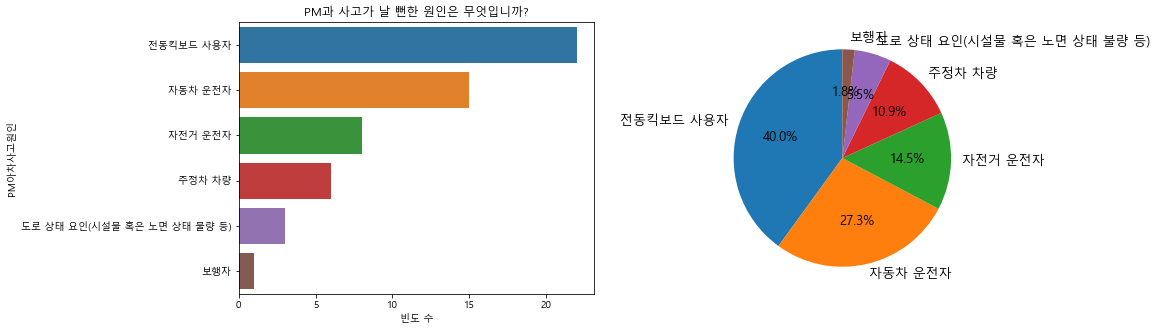

In [131]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = '빈도 수' ,y = PM아차사고원인.index, data = PM아차사고원인)
plt.title('PM과 사고가 날 뻔한 원인은 무엇입니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(PM아차사고원인['비율'], labels = PM아차사고원인.index,
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)
plt.show()

* 운전자 설문 응답자 중, PM사고가 날뻔한 원인은 전동킥보드 사용자 40.0%, 자동차 운전자 27.3% 로 확인되었음.

#### 2-8. 운전 중에, PM(개인형 이동수단)과 사고가 날 뻔한 위치는 어디입니까?

In [132]:
df_운전자['PM아차사고위치'].notnull().sum()

57

In [133]:
PM아차사고위치 = pd.DataFrame(df_운전자.groupby('PM아차사고위치')['빈도 수'].count())
PM아차사고위치 = PM아차사고위치.sort_values(by = '빈도 수', ascending = False)
PM아차사고위치['비율'] = PM아차사고위치['빈도 수'] / sum(PM아차사고위치['빈도 수']) * 100
PM아차사고위치

,빈도 수,비율
PM아차사고위치,,
차도,28,49.122807
이면도로(골목길),21,36.842105
기타,5,8.771930
자전거 전용도로(도로의 가장자리에 있는 자전거 도로),3,5.263158


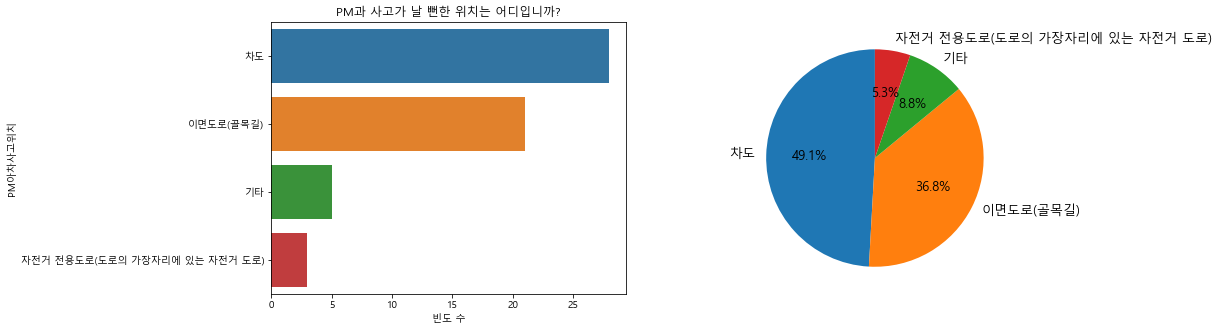

In [134]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = '빈도 수' ,y = PM아차사고위치.index, data = PM아차사고위치)
plt.title('PM과 사고가 날 뻔한 위치는 어디입니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(PM아차사고위치['비율'], labels = PM아차사고위치.index,
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)
plt.show()

* 운전자 응답자 중 PM과 사고가 날 뻔한 위치는 차도 49.1%, 이면도로(골목길) 36.8% , 자전거도로 5.3% 로 확인되었음.

#### 사고 + 아차사고

In [135]:
df_운전자['PM사고경험'] = 0
df_운전자.loc[df_운전자['PM사고'] == '예', 'PM사고경험'] = 1
df_운전자.loc[df_운전자['PM아차사고'] == '예', 'PM사고경험'] = 1

In [136]:
사고경험 = pd.DataFrame(df_운전자.groupby('PM사고경험')['빈도 수'].count())
사고경험['비율'] = 사고경험['빈도 수'] / sum(사고경험['빈도 수']) * 100 
사고경험

,빈도 수,비율
PM사고경험,,
0,85,55.194805
1,69,44.805195


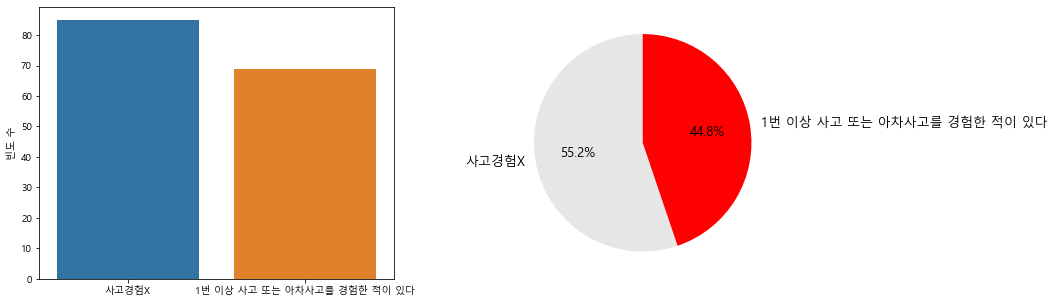

In [137]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적이 있다'], y = '빈도 수', data = 사고경험)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(사고경험['비율'], labels = ['사고경험X', '1번 이상 사고 또는 아차사고를 경험한 적이 있다'],
              autopct = '%1.1f%%', textprops = {'fontsize' : 13}, colors = [(0.9,0.9,0.9), 'red'],
                  shadow = False, startangle = 90)
plt.show()

* 응답자 중 44.8%는 1번 이상 사고 또는 아차사고를 경험한 적이 있다고 응답하였음.

### 3. PM(개인형 이동수단) 통행 관련 문항
#### 3-1. 운전자 입장에서, PM(개인형 이동수단)은 어디로 통행하여야 한다고 생각하십니까?

In [138]:
df_운전자['PM이용도로'].notnull().sum()

140

In [139]:
PM이용도로 = pd.DataFrame(df_운전자.groupby('PM이용도로')['빈도 수'].count())
PM이용도로 = PM이용도로.sort_values(by = '빈도 수', ascending = False)
PM이용도로['비율'] = PM이용도로['빈도 수'] / sum(PM이용도로['빈도 수']) * 100
PM이용도로

,빈도 수,비율
PM이용도로,,
자전거 전용도로,63,45.000000
보도(인도),34,24.285714
차도,23,16.428571
기타,13,9.285714
이면도로(골목길),7,5.000000


In [140]:
colors = ['red','lightgrey','lightgrey','lightgrey', 'lightgrey']

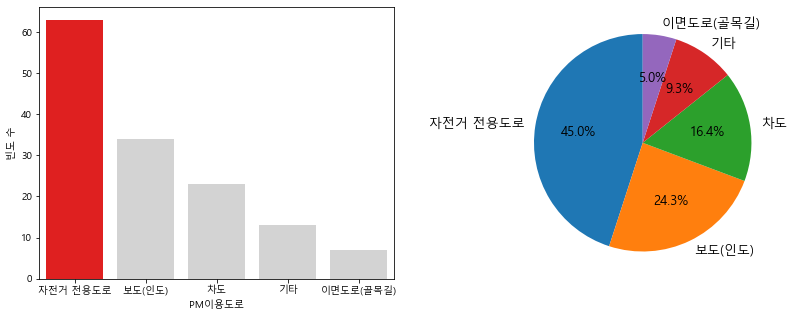

In [141]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = PM이용도로.index , y = '빈도 수' , data = PM이용도로, palette=colors)

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(PM이용도로['비율'], labels = PM이용도로.index,
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)
plt.show()

* 운전자 입장에서 PM전용도로가 어디로 통행하여야 하는가에 대한 응답으로 자전거 전용도로 45.0%, 보도(인도) 24.3%, 차도 16.3%, 이면도로(골목길) 5.0%, 기타 9.3%로 확인되었음.

#### 3-2. 3-1 문항에서 체크한 곳이라고 생각하시는 이유를 작성해주십시오.
* PM이용도로_이유  : 워드클라우드 분석

In [142]:
운전자_mask = np.array(Image.open("C:/Users/user/Desktop/WordCloud 마스크/자동차.png"))

In [143]:
주이용보도 = df_운전자.loc[df_운전자['PM이용도로'] == '보도(인도)']['PM이용도로_이유']
주이용차도 = df_운전자.loc[df_운전자['PM이용도로'] == '차도']['PM이용도로_이유']
주이용자전거전용 = df_운전자.loc[df_운전자['PM이용도로'] == '자전거 전용도로']['PM이용도로_이유']

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


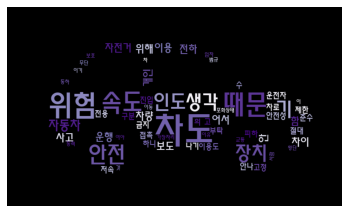

In [144]:
# 주로 보도로 다녀야한다 이유 시각화
text = 주이용보도
text = str(text)
text =''.join(text)
name = "주이용보도"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]

#사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 운전자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/차량운전자/{name}_{colormap}.jpg')

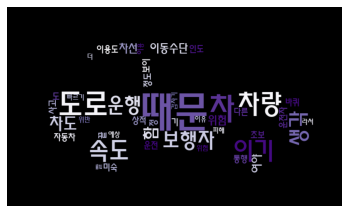

In [145]:
# 주로 차도로 다녀야한다 이유 시각화
text = 주이용차도
text = str(text)
text =''.join(text)
name = "주이용차도"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]

#사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 운전자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/차량운전자/{name}_{colormap}.jpg')

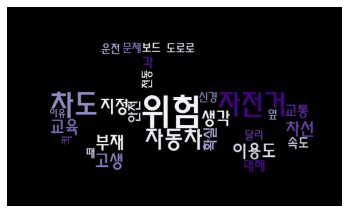

In [146]:
# 주로 자전거도로로 다녀야한다 이유 시각화
text = 주이용자전거전용
text = str(text)
text =''.join(text)
name = "주이용자전거전용"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]

#사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 운전자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/차량운전자/{name}_{colormap}.jpg')

#### 3-3. 운전자 입장에서, PM(개인형 이동수단) 운행에 있어 개선할 사항이 있다면 체크해 주십시오. (2개)

In [147]:
개선사항 = 개선사항.sort_values(by = '합계', ascending = False)
개선사항['비율'] = 개선사항['합계'] / sum(개선사항['합계']) * 100
개선사항

,index,합계,비율
1,도로/보도 환경 개선,107.0,38.768116
0,사고시 보험문제 개선,66.0,23.913043
2,운영방식 개선,33.0,11.956522
6,법 제도 개선,22.0,7.971014
3,편리성 증대,20.0,7.246377
5,대중교통 환승 연계,15.0,5.434783
4,PM 장비개선,11.0,3.985507
7,기타,2.0,0.724638


In [148]:
colors = ['Blue','lightblue','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey']

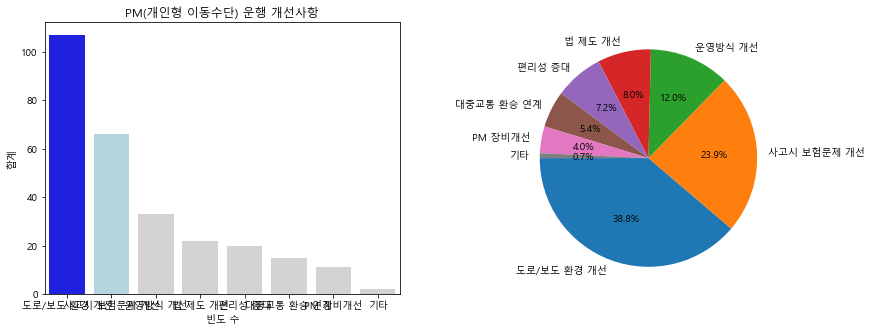

In [149]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x =  개선사항['index'], y = '합계', data = 개선사항, palette = colors)
plt.xlabel('빈도 수')
plt.title('PM(개인형 이동수단) 운행 개선사항')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(개선사항['비율'], labels = 개선사항['index'],
              autopct = '%1.1f%%', textprops = {'fontsize' : 10},
                  shadow = False, startangle = 180)
plt.show()

* PM(개인형 이동수단) 운행에 있어 개선할 사항은 도로/보도 환경 개선 38.8%, 사고시 보험문제 개선 23.9%, 운영방식 개선 12.0% 등으로 확인되었음.

### 4. PM(개인형 이동수단) 통행 인프라 관련 문항
#### 4-1. 운전자 입장에서, PM(개인형 이동수단) 전용도로의 필요성에 대하여 어떻게 생각하십니까?

In [150]:
df_운전자['PM전용도로찬/반'].notnull().sum()

138

In [151]:
PM전용도로찬반 = pd.DataFrame(df_운전자.groupby('PM전용도로찬/반')['빈도 수'].count())
PM전용도로찬반 = PM전용도로찬반.sort_values(by = '빈도 수', ascending = False)
PM전용도로찬반['비율'] = PM전용도로찬반['빈도 수'] / sum(PM전용도로찬반['빈도 수']) * 100
PM전용도로찬반

,빈도 수,비율
PM전용도로찬/반,,
찬성,100,72.463768
반대,33,23.913043
잘 모르겠다,5,3.623188


In [152]:
colors = ['red', 'grey', 'lightgrey']

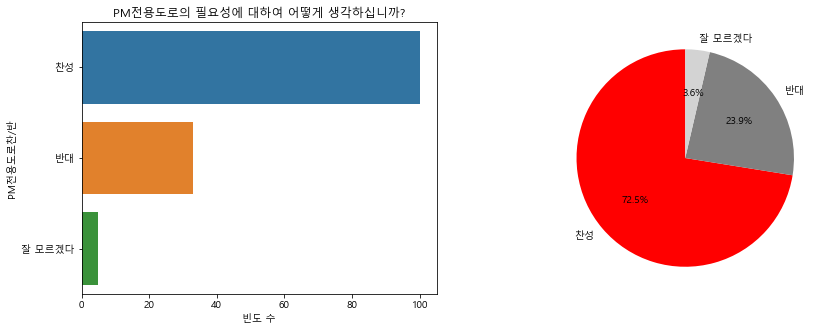

In [153]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = '빈도 수' , y = PM전용도로찬반.index, data = PM전용도로찬반)
plt.title('PM전용도로의 필요성에 대하여 어떻게 생각하십니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(PM전용도로찬반['비율'], labels = PM전용도로찬반.index,
              autopct = '%1.1f%%', textprops = {'fontsize' : 10},
                  shadow = False, startangle = 90, colors = colors)
plt.show()

* PM전용도로의 필요성에 대한 응답은, 찬성 72.5% 반대 23.9%, 잘 모르겠다 3.6%로 확인되었음.

#### 4-2. 4-1번에서 선택한 의견의 이유를 적어주십시오.


In [154]:
전용도로찬성 = df_운전자.loc[df_운전자['PM전용도로찬/반'] == '찬성']['전용도로찬/반_이유']
전용도로반대 = df_운전자.loc[df_운전자['PM전용도로찬/반'] == '반대']['전용도로찬/반_이유']

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


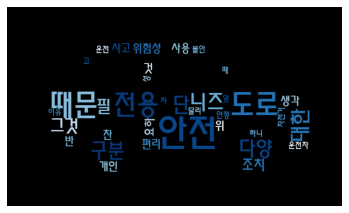

In [155]:
# 전용도로 찬성한다 이유 시각화
text = 전용도로찬성
text = str(text)
text =''.join(text)
name = "전용도로찬성"
colormap = "Blues"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]

#사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 운전자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/차량운전자/{name}_{colormap}.jpg')

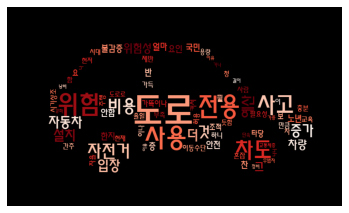

In [156]:
# 전용도로 반대한다 이유 시각화
text = 전용도로반대
text = str(text)
text =''.join(text)
name = "전용도로반대"
colormap = "Reds"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]

#사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 운전자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/차량운전자/{name}_{colormap}.jpg')

#### 4-3. 만약 PM(개인형 이동수단) 전용도로를 설치한다면, 어느 위치에 설치하는 것이 합리적이라고 생각하십니까?

In [157]:
전용도로위치 = pd.DataFrame(df_운전자.groupby('전용도로위치')['빈도 수'].count())
전용도로위치 = 전용도로위치.sort_values(by = '빈도 수', ascending = False)
전용도로위치['비율'] = 전용도로위치['빈도 수'] / sum(전용도로위치['빈도 수']) * 100
전용도로위치

,빈도 수,비율
전용도로위치,,
보도(인도),69,55.2
차도,33,26.4
기타,23,18.4


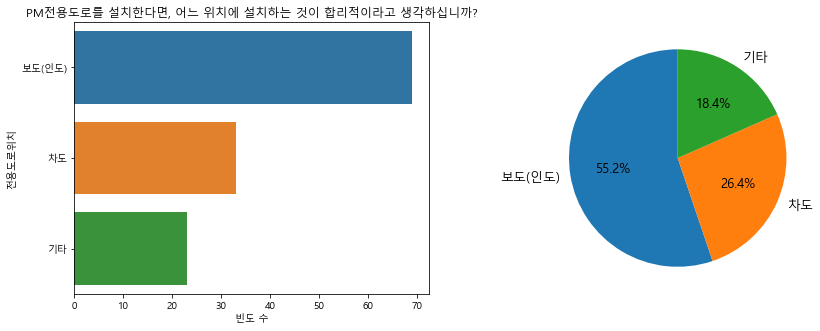

In [158]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = '빈도 수' , y = 전용도로위치.index, data = 전용도로위치)
plt.title('PM전용도로를 설치한다면, 어느 위치에 설치하는 것이 합리적이라고 생각하십니까?')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(전용도로위치['비율'], labels = 전용도로위치.index,
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)
plt.show()

* 운전자 설문에서 PM전용도로 설치 위치는 보도(인도) 55.2%, 차도 26.4%, 기타 18.4% 의 선호가 있는 것으로 확인되었음.
* 운전자 입장에서 PM전용도로 설치 위치 선호는 보도(인도)가 높게 확인되었음.

#### 4-4. 4-3번에서 선택한 의견에 대한 이유를 적어주십시오.

In [159]:
df_운전자.columns

Index(['작성일시', '성별', '연령', '주이용차종', '면허취득기간', '실제운전기간', '1주일 운전횟수', '1년평균주행거리',
       '운전목적', 'PM사고', 'PM사고횟수', 'PM사고원인', 'PM사고위치', 'PM아차사고', 'PM아차사고횟수',
       'PM아차사고원인', 'PM아차사고위치', 'PM이용도로', 'PM이용도로_이유', 'PM개선사항', 'PM전용도로찬/반',
       '전용도로찬/반_이유', '전용도로위치', '전용도로위치_이유', '추가의견', '빈도 수', '실운전기간', 'PM사고경험'],
      dtype='object')

In [160]:
위치보도 = df_운전자.loc[df_운전자['전용도로위치'] == '보도(인도)']['전용도로위치_이유']
위치차도 = df_운전자.loc[df_운전자['전용도로위치'] == '차도']['전용도로위치_이유']

In [161]:
text = 위치보도
text = str(text)
text =''.join(text)
text

'1                                     차도는 더 줄이기 힘든 곳이 많다\n2                                                    안정성\n3                   차도에 하는것보다 인도에 하는게 더 안전, 속도도 낼 수 없을것 \n4                                                차도가 좁기에\n6                                       차랑 같이 다니면 너무 위험함\n                             ...                        \n143                                                  NaN\n144                            차도는 차도 많이 다니는데 위험해서요 서로서로\n146    PM은 좀 더 안정적이고 취미적인 개념으로 확대되야 한다고 생각, PM은 전체적 의...\n149                                             지정 차도 준수\n152                                      보도 옆으로 전용도로를 이용\nName: 전용도로위치_이유, Length: 69, dtype: object'

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


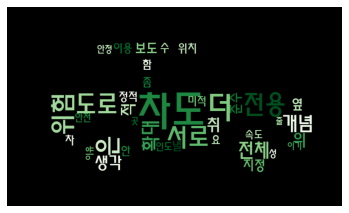

In [162]:
# 전용도로는 보도에 설치해야한다 이유 시각화
text = 위치보도
text = str(text)
text =''.join(text)
name = "위치보도"
colormap = "Greens"
twitter = Twitter()
        
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

#사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 운전자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/차량운전자/{name}_{colormap}.jpg')

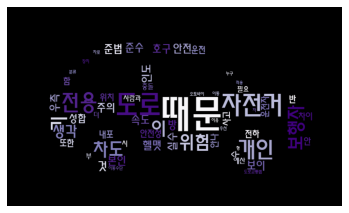

In [163]:
# 전용도로는 차도에 설치되어야 한다 이유 시각화
text = 위치차도
text = str(text)
text =''.join(text)
name = "위치차도"
colormap = "Purples"
twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)
text_file = pd.Series(text_file).value_counts()

stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와","도로","인도",
             "있으므로", "로운", "가필",'에서도',"에서","하고","에게", "으로","에서","위해","하지"]

#사용하지 않을 단어 또는 문장 추가
# line = [i for i in text_file if i not in stop_word]

# tags = Counter(line).most_common()
# print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap,
                  width=3000, height=2000, mask = 운전자_mask)
cloud = wc.generate_from_frequencies(dict(text_file))

plt.imshow(cloud) 
plt.axis('off')
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/차량운전자/{name}_{colormap}.jpg')

#### 5. PM(personal mobility) 전용도로 이외에 PM(개인형 이동수단) 통행과 관련하여 추가적인 의견이 있다면 기술해주십시오.

In [164]:
text = df_운전자['추가의견']
text = str(text)
text =''.join(text)
text

'0                         NaN\n1      PM사용 운전자도 교통 규율을 잘지키도록\n2                       단속 강화\n3          자전거 전용도로 확대가 필요하다 \n4                         NaN\n                ...          \n149                       NaN\n150                       NaN\n151                       NaN\n152                       NaN\n153                       NaN\nName: 추가의견, Length: 154, dtype: object'

### 항목별 찬성반대 교차분석
* PM 이용 빈도에 따른 의견 차이 보여주기
* 밖에 외출하는 빈도, 이용빈도 등 에 따른 의견 차이
    1. PM도로 - 전체(찬/반) - 4-2. 왜 찬성 왜 반대? 워드클라우드
    2. 서술형 문항 4-2, 4-4, 5 - 기준을 나눠서. 이용횟수별로 나눠서 워드 클라우드.


* 비교항목: 사고(아차/실제) , 전용도로찬반, 설치위치, 이유(워드 클라우드), 개선사항(객관식 문항) 

1. 성별 
- 남자 표본수가 월등히 많긴 함
- 분석: PM이용자(남/여) , 보행자(남/여), 차량운전자(남/여) 로 분류

2. 연령 
- 20대가 월등히 많음, 타 연령대 표본 부족하므로 전체 합쳐서 비교
- 사고(아차/실제) , 전용도로찬반, 설치위치, 이유 (워드클라우드), 개선사항(객관식 문항)
-- PM이용자 20대가 많이 나온건 합당한 결과. 
전체 합친 결과 연령대별 찬반 시각화 했을 때 30대 이상 연령층에서 운전자 한정의 결과가 보인다면 좋을 듯
(한계: 처음 설문항목을 PM이용자/보행자/운전자로 범주화 했기에, 운전자의 입장을 더 생각하여 설문에 참여했을 수도 있다는 점)
- 20~30대가 설문 인원 중 가장 많음(PM이용자: 115 / 보행자: 50 / 운전자: 38)
-- 20~30대에 대하여 PM이용자/보행자/운전자 비교 진행

3. 실제 이용(언제부터 이용했는지) : 오래동안 탔던 사람 / 적게 탄 사람 간 의견 차이 존재할 수 있으므로 비교해본다.

4. 얼마나 자주 이용하는지 : 주 1회 미만이 85건으로 압도적으로 많음. 주 1회 미만 vs 주 1회 이상(22건) 으로 비교

5. 평균 주행 시간: 5분 단위, 10분 단위... 로 쪼개보고 각 단위별 응답건수가 비슷하게 나오는 것들로 분석 실시

6. 목적별 : 범주화 되어있는 대로 분석 실시

* 3~5는 운전자/보행자에 대해서도 동일하게 적용하여 분석 진행
 

### 교차분석

#### 성별 - 사고 교차분석

In [165]:
df_운전자['PM사고경험'] = 0
df_운전자.loc[df_운전자['PM사고'] == '예', 'PM사고경험'] = 1
df_운전자.loc[df_운전자['PM아차사고'] == '예', 'PM사고경험'] = 1
df_운전자.columns

Index(['작성일시', '성별', '연령', '주이용차종', '면허취득기간', '실제운전기간', '1주일 운전횟수', '1년평균주행거리',
       '운전목적', 'PM사고', 'PM사고횟수', 'PM사고원인', 'PM사고위치', 'PM아차사고', 'PM아차사고횟수',
       'PM아차사고원인', 'PM아차사고위치', 'PM이용도로', 'PM이용도로_이유', 'PM개선사항', 'PM전용도로찬/반',
       '전용도로찬/반_이유', '전용도로위치', '전용도로위치_이유', '추가의견', '빈도 수', '실운전기간', 'PM사고경험'],
      dtype='object')

In [166]:
남자PM사고 = df_운전자.loc[df_운전자['성별'] == '남자']
여자PM사고 = df_운전자.loc[df_운전자['성별'] == '여자']

In [167]:
남자PM사고경험 = pd.DataFrame(남자PM사고.groupby('PM사고경험')['빈도 수'].count())
남자PM사고경험['비율'] = 남자PM사고경험['빈도 수'] / sum(남자PM사고경험['빈도 수']) * 100 
남자PM사고경험

,빈도 수,비율
PM사고경험,,
0,76,54.676259
1,63,45.323741


In [168]:
여자PM사고경험 = pd.DataFrame(여자PM사고.groupby('PM사고경험')['빈도 수'].count())
여자PM사고경험['비율'] = 여자PM사고경험['빈도 수'] / sum(여자PM사고경험['빈도 수']) * 100 
여자PM사고경험

,빈도 수,비율
PM사고경험,,
0,9,60.0
1,6,40.0


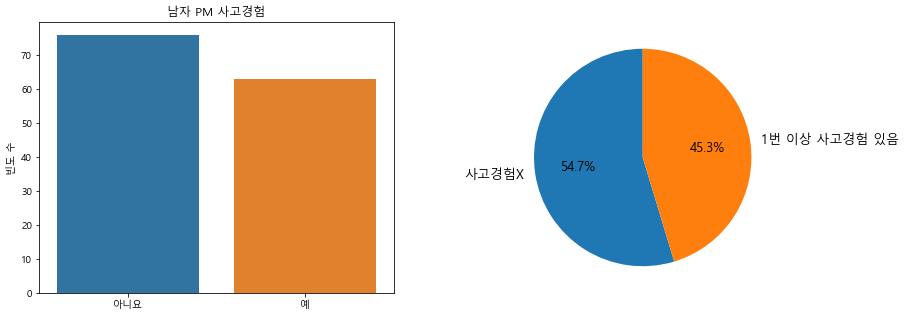

In [169]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = ['아니요', '예'], y = '빈도 수', data = 남자PM사고경험)
plt.title('남자 PM 사고경험')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(남자PM사고경험['비율'], labels = ['사고경험X', '1번 이상 사고경험 있음'],
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)
plt.show()

* 남성 운전자 중, PM 사고경험이 있는 인원은 45.3% 로 확인되었음 (사고경험은 사고와 아차사고를 합친 값임)

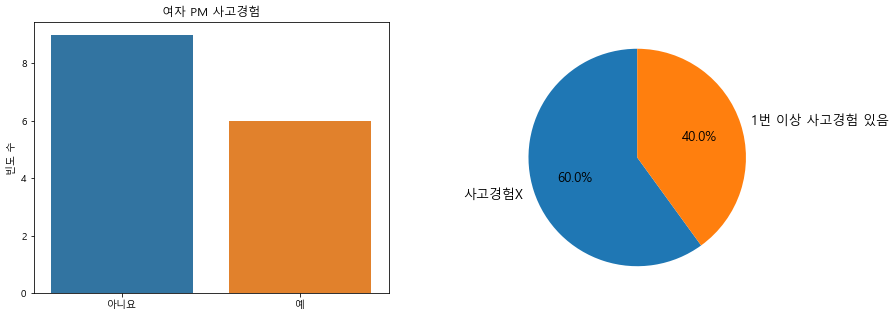

In [170]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = ['아니요', '예'], y = '빈도 수', data = 여자PM사고경험)
plt.title('여자 PM 사고경험')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(여자PM사고경험['비율'], labels = ['사고경험X', '1번 이상 사고경험 있음'],
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)
plt.show()

* 여성 운전자 중, PM사고 경험이 있는 인원은 40.0%으로 확인되었음.

#### 성별 - PM전용도로찬/반 교차분석

In [169]:
남자찬반 = pd.DataFrame(남자PM사고.groupby('PM전용도로찬/반')['빈도 수'].count())
남자찬반 = 남자찬반.sort_values(by = '빈도 수', ascending = False)
남자찬반['비율'] = 남자찬반['빈도 수'] / sum(남자찬반['빈도 수']) * 100 
남자찬반

,빈도 수,비율
PM전용도로찬/반,,
찬성,87,70.161290
반대,32,25.806452
잘 모르겠다,5,4.032258


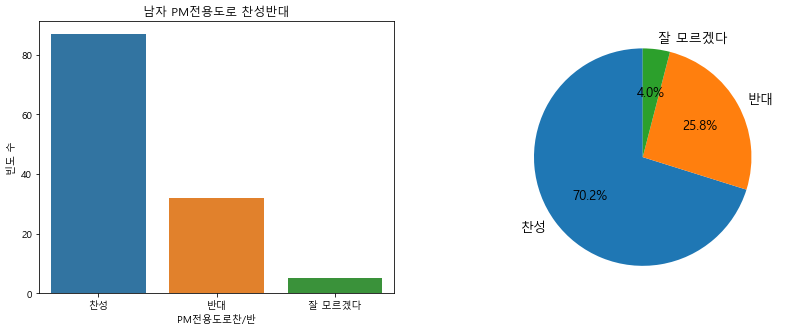

In [170]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = 남자찬반.index, y = '빈도 수', data = 남자찬반)
plt.title('남자 PM전용도로 찬성반대')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(남자찬반['비율'], labels = 남자찬반.index,
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)
plt.show()

* 남성 운전자 응답에서, PM전용도로의 필요성에 대해 찬성 70.2%, 반대 25.8%, 잘 모르겠다 4.0% 순으로 응답하였음.

In [171]:
여자찬반 = pd.DataFrame(여자PM사고.groupby('PM전용도로찬/반')['빈도 수'].count())
여자찬반 = 여자찬반.sort_values(by = '빈도 수', ascending = False)
여자찬반['비율'] = 여자찬반['빈도 수'] / sum(여자찬반['빈도 수']) * 100 
여자찬반

,빈도 수,비율
PM전용도로찬/반,,
찬성,13,92.857143
반대,1,7.142857


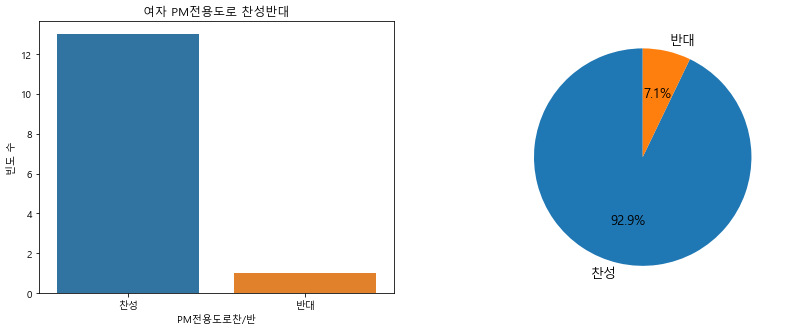

In [172]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = 여자찬반.index, y = '빈도 수', data = 여자찬반)
plt.title('여자 PM전용도로 찬성반대')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(여자찬반['비율'], labels = 여자찬반.index,
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)
plt.show()

* 여성 운전자 응답에서, PM전용도로의 필요성에 대해 찬성 92.9%, 반대 7.1% 으로 응답하였음.

#### 성별 - 전용도로위치 교차분석

In [173]:
남자위치 = pd.DataFrame(남자PM사고.groupby('전용도로위치')['빈도 수'].count())
남자위치 = 남자위치.sort_values(by = '빈도 수', ascending = False)
남자위치['비율'] = 남자위치['빈도 수'] / sum(남자위치['빈도 수']) * 100 
남자위치

,빈도 수,비율
전용도로위치,,
보도(인도),63,57.272727
차도,25,22.727273
기타,22,20.000000


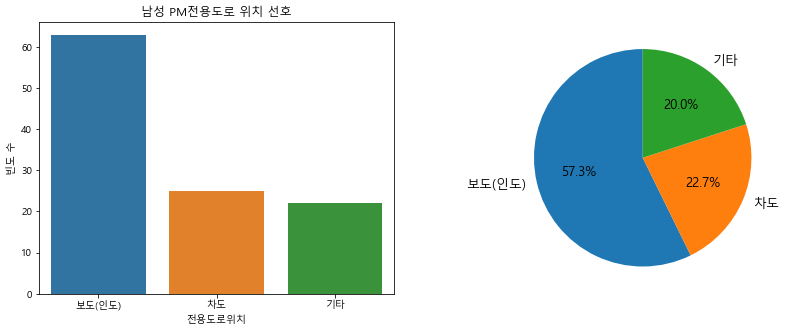

In [174]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = 남자위치.index, y = '빈도 수', data = 남자위치)
plt.title('남성 PM전용도로 위치 선호')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(남자위치['비율'], labels = 남자위치.index,
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)
plt.show()

* 남성 운전자 응답에서, PM전용도로 위치 선호는 보도(인도) 57.3%, 차도 22.7%, 기타 20.0% 순으로 나타났음.

In [175]:
여자위치 = pd.DataFrame(여자PM사고.groupby('전용도로위치')['빈도 수'].count())
여자위치 = 여자위치.sort_values(by = '빈도 수', ascending = False)
여자위치['비율'] = 여자위치['빈도 수'] / sum(여자위치['빈도 수']) * 100 
여자위치

,빈도 수,비율
전용도로위치,,
차도,8,53.333333
보도(인도),6,40.000000
기타,1,6.666667


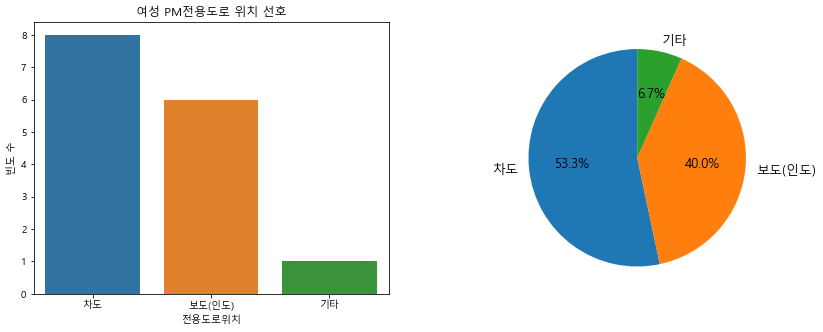

In [176]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x = 여자위치.index, y = '빈도 수', data = 여자위치)
plt.title('여성 PM전용도로 위치 선호')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(여자위치['비율'], labels = 여자위치.index,
              autopct = '%1.1f%%', textprops = {'fontsize' : 13},
                  shadow = False, startangle = 90)
plt.show()

* 여성 운전자 응답에서, PM전용도로 위치 선호는 차도 53.3%, 보도(인도) 40.0%, 기타 6.7% 순으로 나타났음.
* 여성 운전자 응답 건수가 적은 것 고려가 필요해보임.

#### 실제 운전기간별 - 사고 교차분석

In [177]:
df_운전자.loc[(df_운전자['실제운전기간'] >= 0) & (df_운전자['실제운전기간'] < 10),'실운전기간'] = '0~10년'
df_운전자.loc[(df_운전자['실제운전기간'] >= 10) & (df_운전자['실제운전기간'] < 20),'실운전기간'] = '10~20년'
df_운전자.loc[(df_운전자['실제운전기간'] >= 20) & (df_운전자['실제운전기간'] < 30),'실운전기간'] = '20~30년'
df_운전자.loc[(df_운전자['실제운전기간'] >= 30) & (df_운전자['실제운전기간'] < 40),'실운전기간'] = '30~40년'
df_운전자.loc[(df_운전자['실제운전기간'] >= 40) & (df_운전자['실제운전기간'] < 50),'실운전기간'] = '40~50년'
df_운전자.loc[(df_운전자['실제운전기간'] >= 50) & (df_운전자['실제운전기간'] < 60),'실운전기간'] = '50~60년'
df_운전자[['실운전기간','PM사고경험']]

,실운전기간,PM사고경험
0,0~10년,1
1,0~10년,1
2,0~10년,0
3,0~10년,1
4,0~10년,0
...,...,...
149,0~10년,0
150,20~30년,0
151,40~50년,1
152,0~10년,0


In [178]:
운전기간사고경험_2 = pd.DataFrame(df_운전자.groupby(['실운전기간','PM사고경험'])['빈도 수'].count())
운전기간사고경험_2

빈도 수
실운전기간  PM사고경험      
0~10년  0         28
       1         22
10~20년 0         12
       1         10
20~30년 0         28
       1         17
30~40년 0         13
       1         14
40~50년 0          2
       1          4
50~60년 0          2
       1          2

In [179]:
운전기간10 = pd.DataFrame(운전기간사고경험_2.loc[['0~10년']])
운전기간10 = 운전기간10.reset_index()
운전기간10['비율'] = 운전기간10['빈도 수']/sum(운전기간10['빈도 수']) * 100
운전기간10

,실운전기간,PM사고경험,빈도 수,비율
0,0~10년,0,28,56.0
1,0~10년,1,22,44.0


In [180]:
운전기간20 = pd.DataFrame(운전기간사고경험_2.loc[['10~20년']])
운전기간20 = 운전기간20.reset_index()
운전기간20['비율'] = 운전기간20['빈도 수']/sum(운전기간20['빈도 수']) * 100
운전기간20

,실운전기간,PM사고경험,빈도 수,비율
0,10~20년,0,12,54.545455
1,10~20년,1,10,45.454545


In [181]:
운전기간30 = pd.DataFrame(운전기간사고경험_2.loc[['20~30년']])
운전기간30 = 운전기간30.reset_index()
운전기간30['비율'] = 운전기간30['빈도 수']/sum(운전기간30['빈도 수']) * 100
운전기간30

,실운전기간,PM사고경험,빈도 수,비율
0,20~30년,0,28,62.222222
1,20~30년,1,17,37.777778


In [182]:
운전기간40 = pd.DataFrame(운전기간사고경험_2.loc[['30~40년']])
운전기간40 = 운전기간40.reset_index()
운전기간40['비율'] = 운전기간40['빈도 수']/sum(운전기간40['빈도 수']) * 100
운전기간40

,실운전기간,PM사고경험,빈도 수,비율
0,30~40년,0,13,48.148148
1,30~40년,1,14,51.851852


In [183]:
운전기간50 = pd.DataFrame(운전기간사고경험_2.loc[['40~50년']])
운전기간50 = 운전기간50.reset_index()
운전기간50['비율'] = 운전기간50['빈도 수']/sum(운전기간50['빈도 수']) * 100
운전기간50

,실운전기간,PM사고경험,빈도 수,비율
0,40~50년,0,2,33.333333
1,40~50년,1,4,66.666667


In [184]:
운전기간60 = pd.DataFrame(운전기간사고경험_2.loc[['50~60년']])
운전기간60 = 운전기간60.reset_index()
운전기간60['비율'] = 운전기간60['빈도 수']/sum(운전기간60['빈도 수']) * 100
운전기간60

,실운전기간,PM사고경험,빈도 수,비율
0,50~60년,0,2,50.0
1,50~60년,1,2,50.0


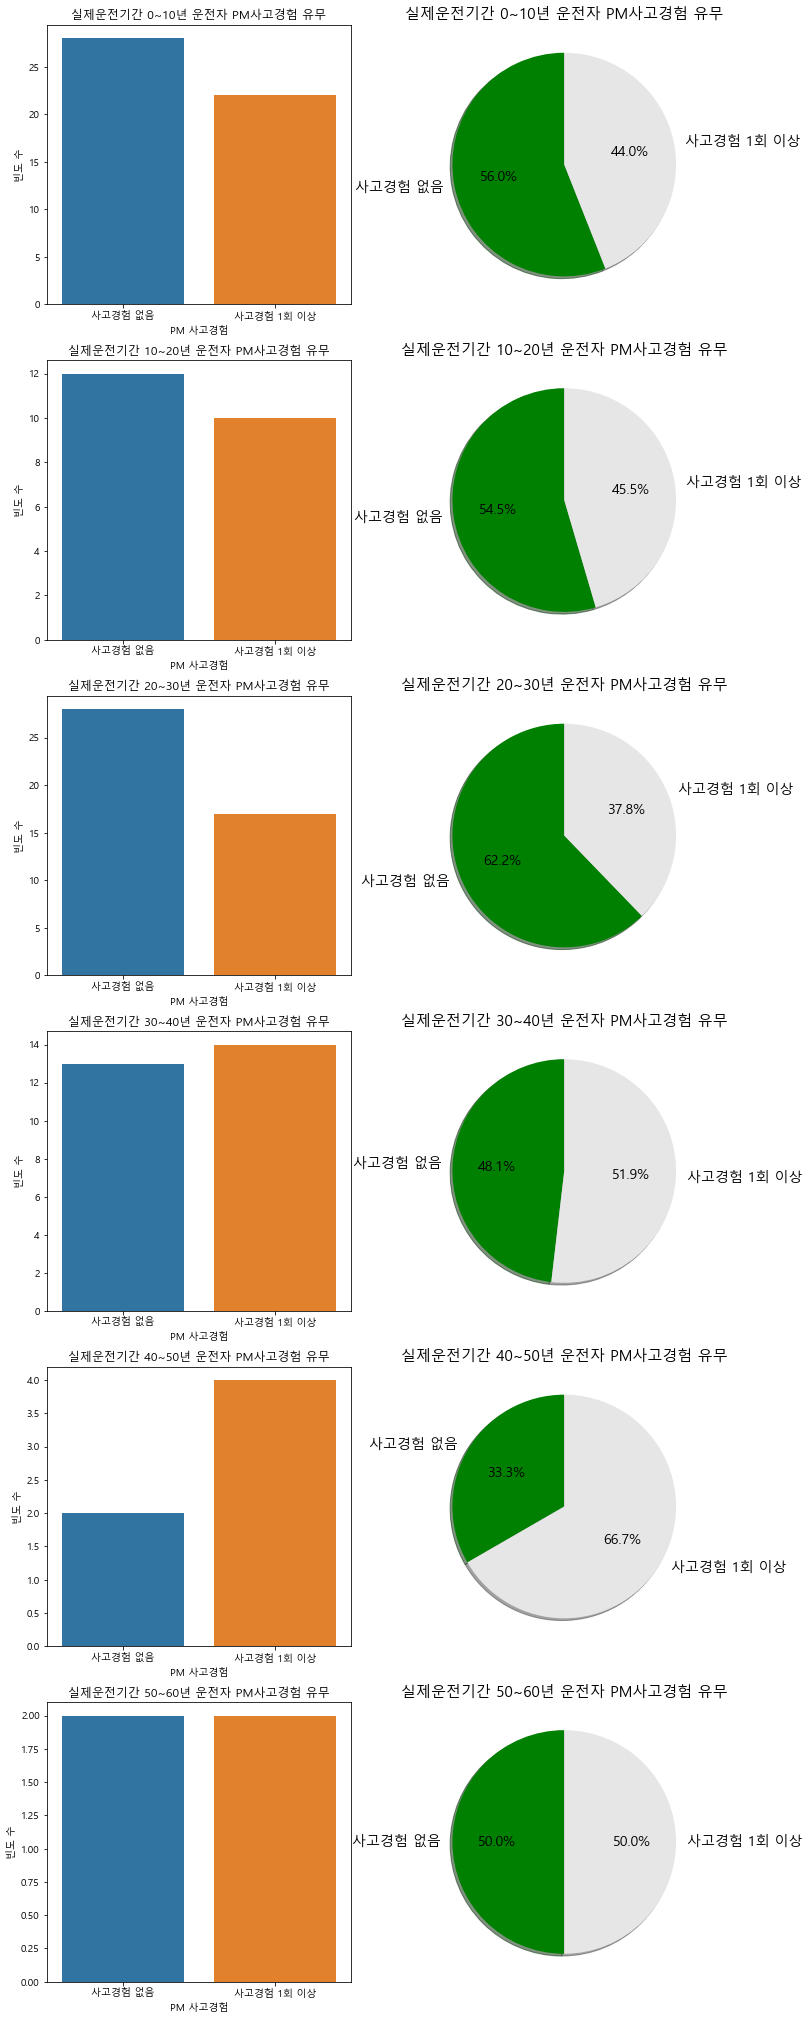

In [185]:
fig = plt.figure(figsize = (12, 36))

ax1 = fig.add_subplot(6,2,1)
ax1 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 운전기간10['빈도 수'])
plt.title('실제운전기간 0~10년 운전자 PM사고경험 유무')
plt.xlabel('PM 사고경험')
plt.ylabel('빈도 수')

ax2 = fig.add_subplot(6,2,2)
ax2 = plt.pie(운전기간10['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 0~10년 운전자 PM사고경험 유무', fontsize = 15)

ax3 = fig.add_subplot(6,2,3)
ax3 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 운전기간20['빈도 수'])
plt.title('실제운전기간 10~20년 운전자 PM사고경험 유무')
plt.xlabel('PM 사고경험')
plt.ylabel('빈도 수')

ax4 = fig.add_subplot(6,2,4)
ax4 = plt.pie(운전기간20['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 10~20년 운전자 PM사고경험 유무', fontsize = 15)

ax5 = fig.add_subplot(6,2,5)
ax5 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 운전기간30['빈도 수'])
plt.title('실제운전기간 20~30년 운전자 PM사고경험 유무')
plt.xlabel('PM 사고경험')
plt.ylabel('빈도 수')

ax6 = fig.add_subplot(6,2,6)
ax6 = plt.pie(운전기간30['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 20~30년 운전자 PM사고경험 유무', fontsize = 15)

ax7 = fig.add_subplot(6,2,7)
ax7 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 운전기간40['빈도 수'])
plt.title('실제운전기간 30~40년 운전자 PM사고경험 유무')
plt.xlabel('PM 사고경험')
plt.ylabel('빈도 수')

ax8 = fig.add_subplot(6,2,8)
ax8 = plt.pie(운전기간40['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 30~40년 운전자 PM사고경험 유무', fontsize = 15)

ax9 = fig.add_subplot(6,2,9)
ax9 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 운전기간50['빈도 수'])
plt.title('실제운전기간 40~50년 운전자 PM사고경험 유무')
plt.xlabel('PM 사고경험')
plt.ylabel('빈도 수')

ax10 = fig.add_subplot(6,2,10)
ax10 = plt.pie(운전기간50['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 40~50년 운전자 PM사고경험 유무', fontsize = 15)

ax11 = fig.add_subplot(6,2,11)
ax11 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 운전기간60['빈도 수'])
plt.title('실제운전기간 50~60년 운전자 PM사고경험 유무')
plt.xlabel('PM 사고경험')
plt.ylabel('빈도 수')

ax12 = fig.add_subplot(6,2,12)
ax12 = plt.pie(운전기간60['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 50~60년 운전자 PM사고경험 유무', fontsize = 15)
plt.show()

* 실제운전기간에 따른 PM사고경험 비율은 0-10년 운전자 44.0%, 10-20년 45.5%, 20-30년 37.8%, 30-40년 51.9%, 40-50년 66.7%, 50-60년 50.0%로 확인되었음.

#### 실제운전기간별 - 전용도로 찬/반 교차분석

In [186]:
df_운전자[['실운전기간','PM전용도로찬/반']]

,실운전기간,PM전용도로찬/반
0,0~10년,찬성
1,0~10년,반대
2,0~10년,찬성
3,0~10년,찬성
4,0~10년,반대
...,...,...
149,0~10년,찬성
150,20~30년,찬성
151,40~50년,반대
152,0~10년,찬성


In [187]:
df_운전자['도로찬반'] = 1
df_운전자['도로찬반']

0      1
1      1
2      1
3      1
4      1
      ..
149    1
150    1
151    1
152    1
153    1
Name: 도로찬반, Length: 154, dtype: int64

In [188]:
실운전기간도로찬반 = pd.DataFrame(df_운전자.groupby(['실운전기간','PM전용도로찬/반'])['도로찬반'].sum())
실운전기간도로찬반

도로찬반
실운전기간  PM전용도로찬/반      
0~10년  반대            9
       잘 모르겠다        1
       찬성           39
10~20년 반대            8
       잘 모르겠다        1
       찬성           11
20~30년 반대            9
       잘 모르겠다        2
       찬성           28
30~40년 반대            6
       찬성           16
40~50년 반대            1
       찬성            4
50~60년 잘 모르겠다        1
       찬성            2

In [189]:
도로찬반_0_10년 = 실운전기간도로찬반.loc[['0~10년']]
도로찬반_0_10년 = 도로찬반_0_10년.reset_index().sort_values(by='PM전용도로찬/반')
도로찬반_0_10년['비율'] = 도로찬반_0_10년['도로찬반']/sum(도로찬반_0_10년['도로찬반']) * 100
도로찬반_0_10년

,실운전기간,PM전용도로찬/반,도로찬반,비율
0,0~10년,반대,9,18.367347
1,0~10년,잘 모르겠다,1,2.040816
2,0~10년,찬성,39,79.591837


In [190]:
df_mapping = pd.DataFrame({'찬반': ['찬성', '반대', '잘 모르겠다']})
sort_mapping = df_mapping.reset_index().set_index('찬반')
sort_mapping

,index
찬반,
찬성,0
반대,1
잘 모르겠다,2


In [191]:
도로찬반_0_10년['찬반_num'] = 도로찬반_0_10년['PM전용도로찬/반'].map(sort_mapping['index'])

In [192]:
도로찬반_0_10년.sort_values('찬반_num')
도로찬반_0_10년 = 도로찬반_0_10년.drop(['찬반_num'], axis = 1)

In [193]:
도로찬반_0_10년

,실운전기간,PM전용도로찬/반,도로찬반,비율
0,0~10년,반대,9,18.367347
1,0~10년,잘 모르겠다,1,2.040816
2,0~10년,찬성,39,79.591837


In [194]:
도로찬반_10_20년 = 실운전기간도로찬반.loc[['10~20년']]
도로찬반_10_20년 = 도로찬반_10_20년.reset_index()
도로찬반_10_20년['비율'] = 도로찬반_10_20년['도로찬반']/sum(도로찬반_10_20년['도로찬반']) * 100
도로찬반_10_20년

,실운전기간,PM전용도로찬/반,도로찬반,비율
0,10~20년,반대,8,40.0
1,10~20년,잘 모르겠다,1,5.0
2,10~20년,찬성,11,55.0


In [195]:
도로찬반_20_30년 = 실운전기간도로찬반.loc[['20~30년']]
도로찬반_20_30년 = 도로찬반_20_30년.reset_index()
도로찬반_20_30년['비율'] = 도로찬반_20_30년['도로찬반']/sum(도로찬반_20_30년['도로찬반']) * 100
도로찬반_20_30년

,실운전기간,PM전용도로찬/반,도로찬반,비율
0,20~30년,반대,9,23.076923
1,20~30년,잘 모르겠다,2,5.128205
2,20~30년,찬성,28,71.794872


In [196]:
도로찬반_30_40년 = 실운전기간도로찬반.loc[['30~40년']]
도로찬반_30_40년 = 도로찬반_30_40년.reset_index()
도로찬반_30_40년['비율'] = 도로찬반_30_40년['도로찬반']/sum(도로찬반_30_40년['도로찬반']) * 100
도로찬반_30_40년

,실운전기간,PM전용도로찬/반,도로찬반,비율
0,30~40년,반대,6,27.272727
1,30~40년,찬성,16,72.727273


In [197]:
도로찬반_40_50년 = 실운전기간도로찬반.loc[['40~50년']]
도로찬반_40_50년 = 도로찬반_40_50년.reset_index()
도로찬반_40_50년['비율'] = 도로찬반_40_50년['도로찬반']/sum(도로찬반_40_50년['도로찬반']) * 100
도로찬반_40_50년

,실운전기간,PM전용도로찬/반,도로찬반,비율
0,40~50년,반대,1,20.0
1,40~50년,찬성,4,80.0


In [198]:
도로찬반_50_60년 = 실운전기간도로찬반.loc[['50~60년']]
도로찬반_50_60년 = 도로찬반_50_60년.reset_index()
도로찬반_50_60년['비율'] = 도로찬반_50_60년['도로찬반']/sum(도로찬반_50_60년['도로찬반']) * 100
도로찬반_50_60년

,실운전기간,PM전용도로찬/반,도로찬반,비율
0,50~60년,잘 모르겠다,1,33.333333
1,50~60년,찬성,2,66.666667


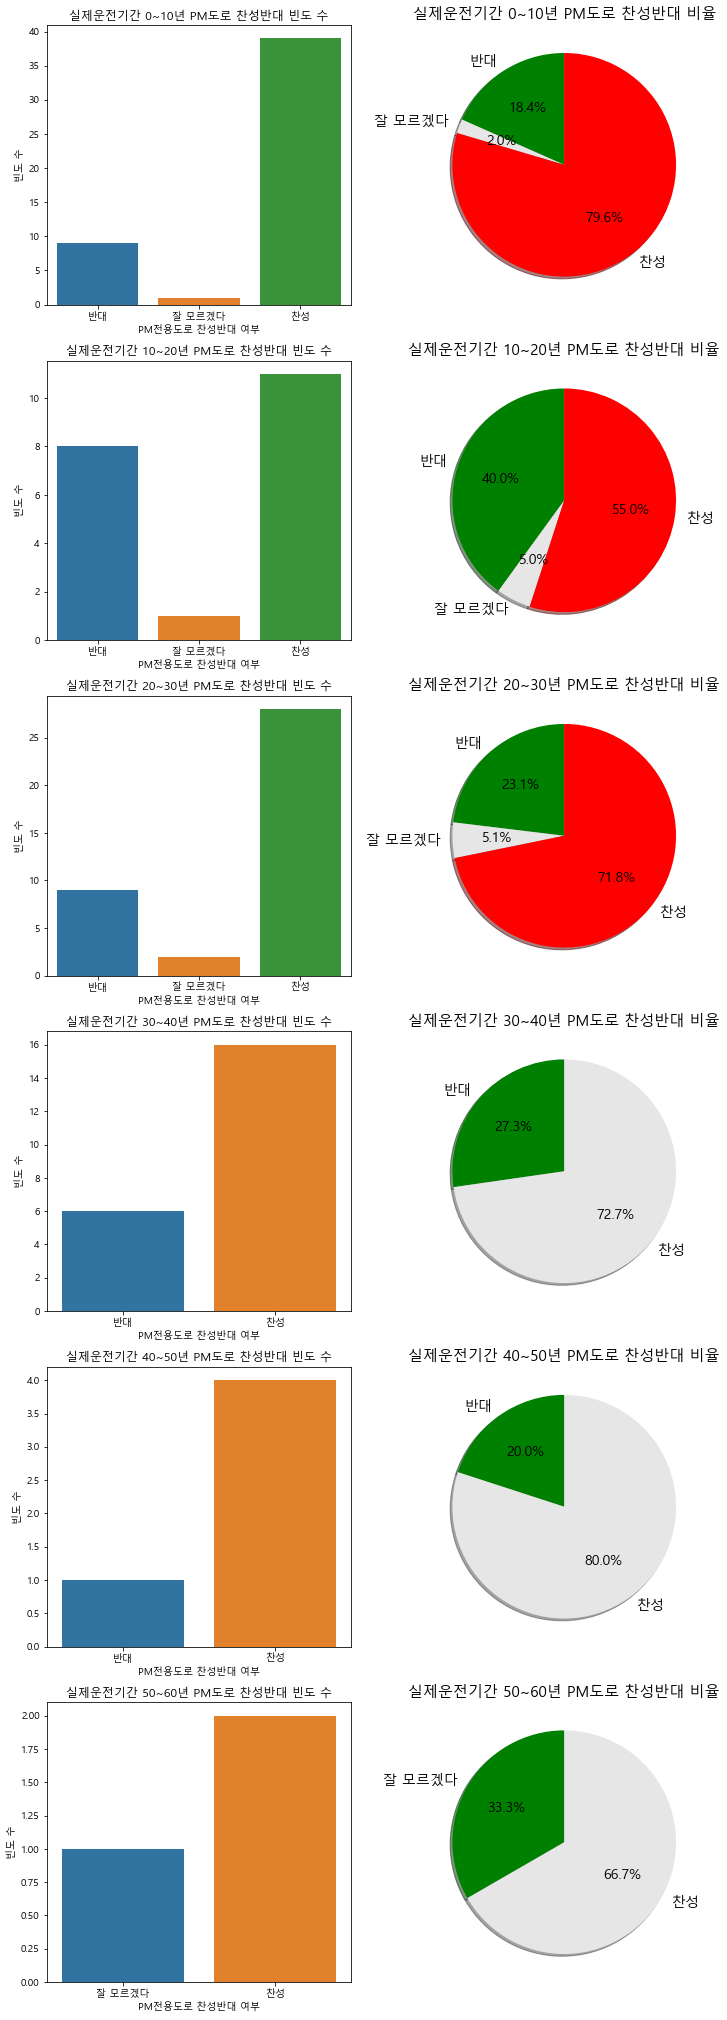

In [199]:
fig = plt.figure(figsize = (12, 36))

ax1 = fig.add_subplot(6,2,1)
ax1 = sns.barplot(x = 도로찬반_0_10년['PM전용도로찬/반'], y = 도로찬반_0_10년['도로찬반'])
plt.title('실제운전기간 0~10년 PM도로 찬성반대 빈도 수')
plt.xlabel('PM전용도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax2 = fig.add_subplot(6,2,2)
ax2 = plt.pie(도로찬반_0_10년['비율'], labels = 도로찬반_0_10년['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 0~10년 PM도로 찬성반대 비율', fontsize = 15)

ax3 = fig.add_subplot(6,2,3)
ax3 = sns.barplot(x = 도로찬반_10_20년['PM전용도로찬/반'], y = 도로찬반_10_20년['도로찬반'])
plt.title('실제운전기간 10~20년 PM도로 찬성반대 빈도 수')
plt.xlabel('PM전용도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax4 = fig.add_subplot(6,2,4)
ax4 = plt.pie(도로찬반_10_20년['비율'], labels = 도로찬반_10_20년['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 10~20년 PM도로 찬성반대 비율', fontsize = 15)

ax5 = fig.add_subplot(6,2,5)
ax5 = sns.barplot(x = 도로찬반_20_30년['PM전용도로찬/반'], y = 도로찬반_20_30년['도로찬반'])
plt.title('실제운전기간 20~30년 PM도로 찬성반대 빈도 수')
plt.xlabel('PM전용도로 찬성반대 여부')
plt.ylabel('빈도 수')


ax6 = fig.add_subplot(6,2,6)
ax6 = plt.pie(도로찬반_20_30년['비율'], labels = 도로찬반_20_30년['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 20~30년 PM도로 찬성반대 비율', fontsize = 15)

ax7 = fig.add_subplot(6,2,7)
ax7 = sns.barplot(x = 도로찬반_30_40년['PM전용도로찬/반'], y = 도로찬반_30_40년['도로찬반'])
plt.title('실제운전기간 30~40년 PM도로 찬성반대 빈도 수')
plt.xlabel('PM전용도로 찬성반대 여부')
plt.ylabel('빈도 수')


ax8 = fig.add_subplot(6,2,8)
ax8 = plt.pie(도로찬반_30_40년['비율'], labels = 도로찬반_30_40년['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 30~40년 PM도로 찬성반대 비율', fontsize = 15)

ax9 = fig.add_subplot(6,2,9)
ax9 = sns.barplot(x = 도로찬반_40_50년['PM전용도로찬/반'], y = 도로찬반_40_50년['도로찬반'])
plt.title('실제운전기간 40~50년 PM도로 찬성반대 빈도 수')
plt.xlabel('PM전용도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax10 = fig.add_subplot(6,2,10)
ax10 = plt.pie(도로찬반_40_50년['비율'], labels = 도로찬반_40_50년['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 40~50년 PM도로 찬성반대 비율', fontsize = 15)

ax11 = fig.add_subplot(6,2,11)
ax11 = sns.barplot(x = 도로찬반_50_60년['PM전용도로찬/반'], y = 도로찬반_50_60년['도로찬반'])
plt.title('실제운전기간 50~60년 PM도로 찬성반대 빈도 수')
plt.xlabel('PM전용도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax12 = fig.add_subplot(6,2,12)
ax12 = plt.pie(도로찬반_50_60년['비율'], labels = 도로찬반_50_60년['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 50~60년 PM도로 찬성반대 비율', fontsize = 15)
plt.show()

* 실제운전기간 0~10년 운전자 PM도로 찬성반대 비율은 찬성 79.6%, 반대 18.4%, 잘 모르겠다 2.0% 로 확인되었음.
* 실제운전기간 10~20년 운전자 PM도로 찬성반대 비율은 찬성 55.0%, 반대 40.0%, 잘 모르겠다 5.0% 로 확인되었음.
* 실제운전기간 20~30년 운전자 PM도로 찬성반대 비율은 찬성 71.8%, 반대 23.1%, 잘 모르겠다 5.1% 로 확인되었음.
* 실제운전기간 30~40년 운전자 PM도로 찬성반대 비율은 찬성 72.7%, 반대 27.3% 로 확인되었음.
* 실제운전기간 40~50년 운전자 PM도로 찬성반대 비율은 찬성 80.0%, 반대 20.0% 로 확인되었음.
* 실제운전기간 50~60년 운전자 PM도로 찬성반대 비율은 찬성 66.7%, 반대 33.3% 로 확인되었음.

#### 실제운전기간별 - 전용도로위치 교차분석

In [200]:
운전기간도로위치 = pd.DataFrame(df_운전자.groupby(['실운전기간','전용도로위치'])['빈도 수'].count())
운전기간도로위치

빈도 수
실운전기간  전용도로위치      
0~10년  기타         8
       보도(인도)    25
       차도        15
10~20년 기타         4
       보도(인도)     8
       차도         6
20~30년 기타         6
       보도(인도)    21
       차도         7
30~40년 기타         5
       보도(인도)    11
       차도         4
40~50년 보도(인도)     1
       차도         1
50~60년 보도(인도)     3

In [201]:
_10년_도로위치 = pd.DataFrame(운전기간도로위치.loc[['0~10년']])
_10년_도로위치 = _10년_도로위치.reset_index()
_10년_도로위치['비율'] = _10년_도로위치['빈도 수']/sum(_10년_도로위치['빈도 수']) * 100
_10년_도로위치

,실운전기간,전용도로위치,빈도 수,비율
0,0~10년,기타,8,16.666667
1,0~10년,보도(인도),25,52.083333
2,0~10년,차도,15,31.250000


In [202]:
_20년_도로위치 = pd.DataFrame(운전기간도로위치.loc[['10~20년']])
_20년_도로위치 = _20년_도로위치.reset_index()
_20년_도로위치['비율'] = _20년_도로위치['빈도 수']/sum(_20년_도로위치['빈도 수']) * 100
_20년_도로위치

,실운전기간,전용도로위치,빈도 수,비율
0,10~20년,기타,4,22.222222
1,10~20년,보도(인도),8,44.444444
2,10~20년,차도,6,33.333333


In [203]:
_30년_도로위치 = pd.DataFrame(운전기간도로위치.loc[['20~30년']])
_30년_도로위치 = _30년_도로위치.reset_index()
_30년_도로위치['비율'] = _30년_도로위치['빈도 수']/sum(_30년_도로위치['빈도 수']) * 100
_30년_도로위치

,실운전기간,전용도로위치,빈도 수,비율
0,20~30년,기타,6,17.647059
1,20~30년,보도(인도),21,61.764706
2,20~30년,차도,7,20.588235


In [204]:
_40년_도로위치 = pd.DataFrame(운전기간도로위치.loc[['30~40년']])
_40년_도로위치 = _40년_도로위치.reset_index()
_40년_도로위치['비율'] = _40년_도로위치['빈도 수']/sum(_40년_도로위치['빈도 수']) * 100
_40년_도로위치

,실운전기간,전용도로위치,빈도 수,비율
0,30~40년,기타,5,25.0
1,30~40년,보도(인도),11,55.0
2,30~40년,차도,4,20.0


In [205]:
_50년_도로위치 = pd.DataFrame(운전기간도로위치.loc[['40~50년']])
_50년_도로위치 = _50년_도로위치.reset_index()
_50년_도로위치['비율'] = _50년_도로위치['빈도 수']/sum(_50년_도로위치['빈도 수']) * 100
_50년_도로위치

,실운전기간,전용도로위치,빈도 수,비율
0,40~50년,보도(인도),1,50.0
1,40~50년,차도,1,50.0


In [206]:
_60년_도로위치 = pd.DataFrame(운전기간도로위치.loc[['50~60년']])
_60년_도로위치 = _60년_도로위치.reset_index()
_60년_도로위치['비율'] = _60년_도로위치['빈도 수']/sum(_60년_도로위치['빈도 수']) * 100
_60년_도로위치

,실운전기간,전용도로위치,빈도 수,비율
0,50~60년,보도(인도),3,100.0


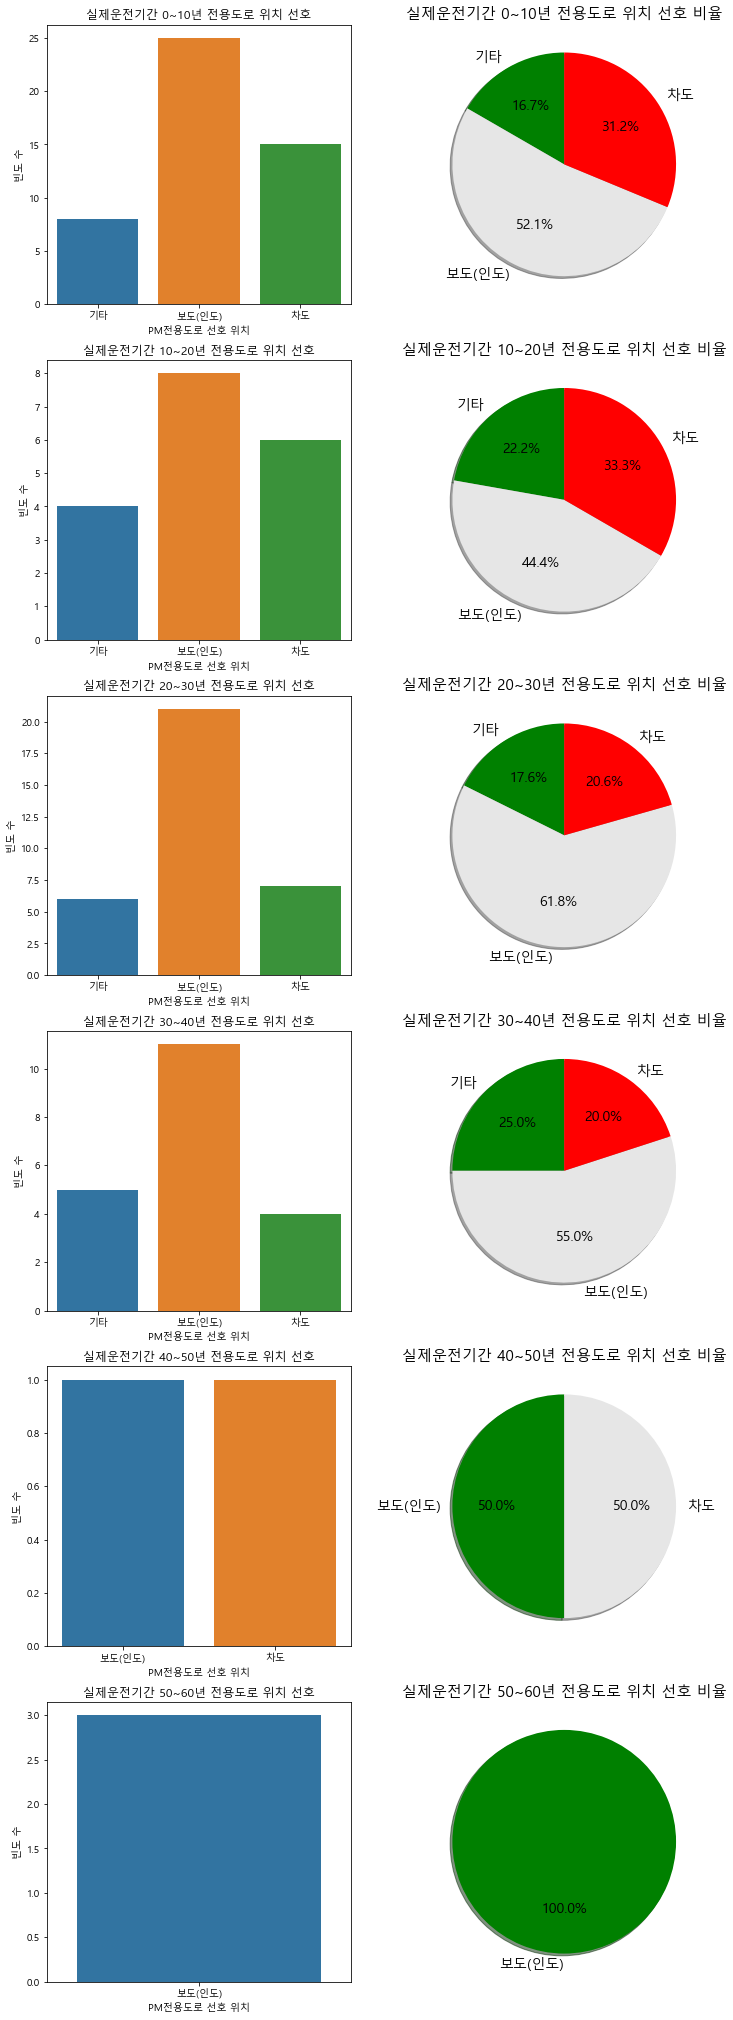

In [207]:
fig = plt.figure(figsize = (12, 36))

ax1 = fig.add_subplot(6,2,1)
ax1 = sns.barplot(x = _10년_도로위치['전용도로위치'], y = _10년_도로위치['빈도 수'])
plt.title('실제운전기간 0~10년 전용도로 위치 선호')
plt.xlabel('PM전용도로 선호 위치')
plt.ylabel('빈도 수')

ax2 = fig.add_subplot(6,2,2)
ax2 = plt.pie(_10년_도로위치['비율'], labels = _10년_도로위치['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 0~10년 전용도로 위치 선호 비율', fontsize = 15)

ax3 = fig.add_subplot(6,2,3)
ax3 = sns.barplot(x = _20년_도로위치['전용도로위치'], y = _20년_도로위치['빈도 수'])
plt.title('실제운전기간 10~20년 전용도로 위치 선호')
plt.xlabel('PM전용도로 선호 위치')
plt.ylabel('빈도 수')

ax4 = fig.add_subplot(6,2,4)
ax4 = plt.pie(_20년_도로위치['비율'], labels = _20년_도로위치['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 10~20년 전용도로 위치 선호 비율', fontsize = 15)

ax5 = fig.add_subplot(6,2,5)
ax5 = sns.barplot(x = _30년_도로위치['전용도로위치'], y = _30년_도로위치['빈도 수'])
plt.title('실제운전기간 20~30년 전용도로 위치 선호')
plt.xlabel('PM전용도로 선호 위치')
plt.ylabel('빈도 수')

ax6 = fig.add_subplot(6,2,6)
ax6 = plt.pie(_30년_도로위치['비율'], labels = _30년_도로위치['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 20~30년 전용도로 위치 선호 비율', fontsize = 15)

ax7 = fig.add_subplot(6,2,7)
ax7 = sns.barplot(x = _40년_도로위치['전용도로위치'], y = _40년_도로위치['빈도 수'])
plt.title('실제운전기간 30~40년 전용도로 위치 선호')
plt.xlabel('PM전용도로 선호 위치')
plt.ylabel('빈도 수')

ax8 = fig.add_subplot(6,2,8)
ax8 = plt.pie(_40년_도로위치['비율'], labels = _40년_도로위치['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 30~40년 전용도로 위치 선호 비율', fontsize = 15)

ax9 = fig.add_subplot(6,2,9)
ax9 = sns.barplot(x = _50년_도로위치['전용도로위치'], y = _50년_도로위치['빈도 수'])
plt.title('실제운전기간 40~50년 전용도로 위치 선호')
plt.xlabel('PM전용도로 선호 위치')
plt.ylabel('빈도 수')

ax10 = fig.add_subplot(6,2,10)
ax10 = plt.pie(_50년_도로위치['비율'], labels = _50년_도로위치['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 40~50년 전용도로 위치 선호 비율', fontsize = 15)

ax11 = fig.add_subplot(6,2,11)
ax11 = sns.barplot(x = _60년_도로위치['전용도로위치'], y = _60년_도로위치['빈도 수'])
plt.title('실제운전기간 50~60년 전용도로 위치 선호')
plt.xlabel('PM전용도로 선호 위치')
plt.ylabel('빈도 수')

ax12 = fig.add_subplot(6,2,12)
ax12 = plt.pie(_60년_도로위치['비율'], labels = _60년_도로위치['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('실제운전기간 50~60년 전용도로 위치 선호 비율', fontsize = 15)
plt.show()

* 실제운전기간 0~10년 운전자들의 PM 전용도로 위치 선호 비율은 보도(인도) 52.1%, 차도 31.2%, 기타 16.7% 로 나타났음.
* 실제운전기간 10~20년 운전자들의 PM 전용도로 위치 선호 비율은 보도(인도) 44.4%, 차도 33.3%, 기타 22.2% 로 나타났음.
* 실제운전기간 20~30년 운전자들의 PM 전용도로 위치 선호 비율은 보도(인도) 61.8%, 차도 20.6%, 기타 17.6% 로 나타났음.
* 실제운전기간 30~40년 운전자들의 PM 전용도로 위치 선호 비율은 보도(인도) 55.0%, 차도 20.0%, 기타 25.0% 로 나타났음.
* 실제운전기간 40~50년 운전자들의 PM 전용도로 위치 선호 비율은 보도(인도) 50.0%, 차도 50.0% 로 나타났음.
* 실제운전기간 50~60년 운전자들의 PM 전용도로 위치 선호 비율은 보도(인도) 100% 로 나타났음.

#### 1주일 운전횟수별 - 사고 교차분석

In [208]:
운전횟수사고경험 = pd.DataFrame(df_운전자.groupby(['1주일 운전횟수','PM사고경험'])['빈도 수'].count())
운전횟수사고경험

빈도 수
1주일 운전횟수 PM사고경험      
1~2회     0         12
         1          5
1회 미만    0          1
         1          3
3~4회     0         17
         1         12
5~6회     0         18
         1          7
매일       0         37
         1         42

In [209]:
운전횟수01 = pd.DataFrame(운전횟수사고경험.loc[['1회 미만']])
운전횟수01 = 운전횟수01.reset_index()
운전횟수01['비율'] = 운전횟수01['빈도 수']/sum(운전횟수01['빈도 수']) * 100
운전횟수01

,1주일 운전횟수,PM사고경험,빈도 수,비율
0,1회 미만,0,1,25.0
1,1회 미만,1,3,75.0


In [210]:
운전횟수12 = pd.DataFrame(운전횟수사고경험.loc[['1~2회']])
운전횟수12 = 운전횟수12.reset_index()
운전횟수12['비율'] = 운전횟수12['빈도 수']/sum(운전횟수12['빈도 수']) * 100
운전횟수12

,1주일 운전횟수,PM사고경험,빈도 수,비율
0,1~2회,0,12,70.588235
1,1~2회,1,5,29.411765


In [211]:
운전횟수34 = pd.DataFrame(운전횟수사고경험.loc[['3~4회']])
운전횟수34 = 운전횟수34.reset_index()
운전횟수34['비율'] = 운전횟수34['빈도 수']/sum(운전횟수34['빈도 수']) * 100
운전횟수34

,1주일 운전횟수,PM사고경험,빈도 수,비율
0,3~4회,0,17,58.62069
1,3~4회,1,12,41.37931


In [212]:
운전횟수56 = pd.DataFrame(운전횟수사고경험.loc[['5~6회']])
운전횟수56 = 운전횟수56.reset_index()
운전횟수56['비율'] = 운전횟수56['빈도 수']/sum(운전횟수56['빈도 수']) * 100
운전횟수56

,1주일 운전횟수,PM사고경험,빈도 수,비율
0,5~6회,0,18,72.0
1,5~6회,1,7,28.0


In [213]:
운전횟수7 = pd.DataFrame(운전횟수사고경험.loc[['매일']])
운전횟수7 = 운전횟수7.reset_index()
운전횟수7['비율'] = 운전횟수7['빈도 수']/sum(운전횟수7['빈도 수']) * 100
운전횟수7

,1주일 운전횟수,PM사고경험,빈도 수,비율
0,매일,0,37,46.835443
1,매일,1,42,53.164557


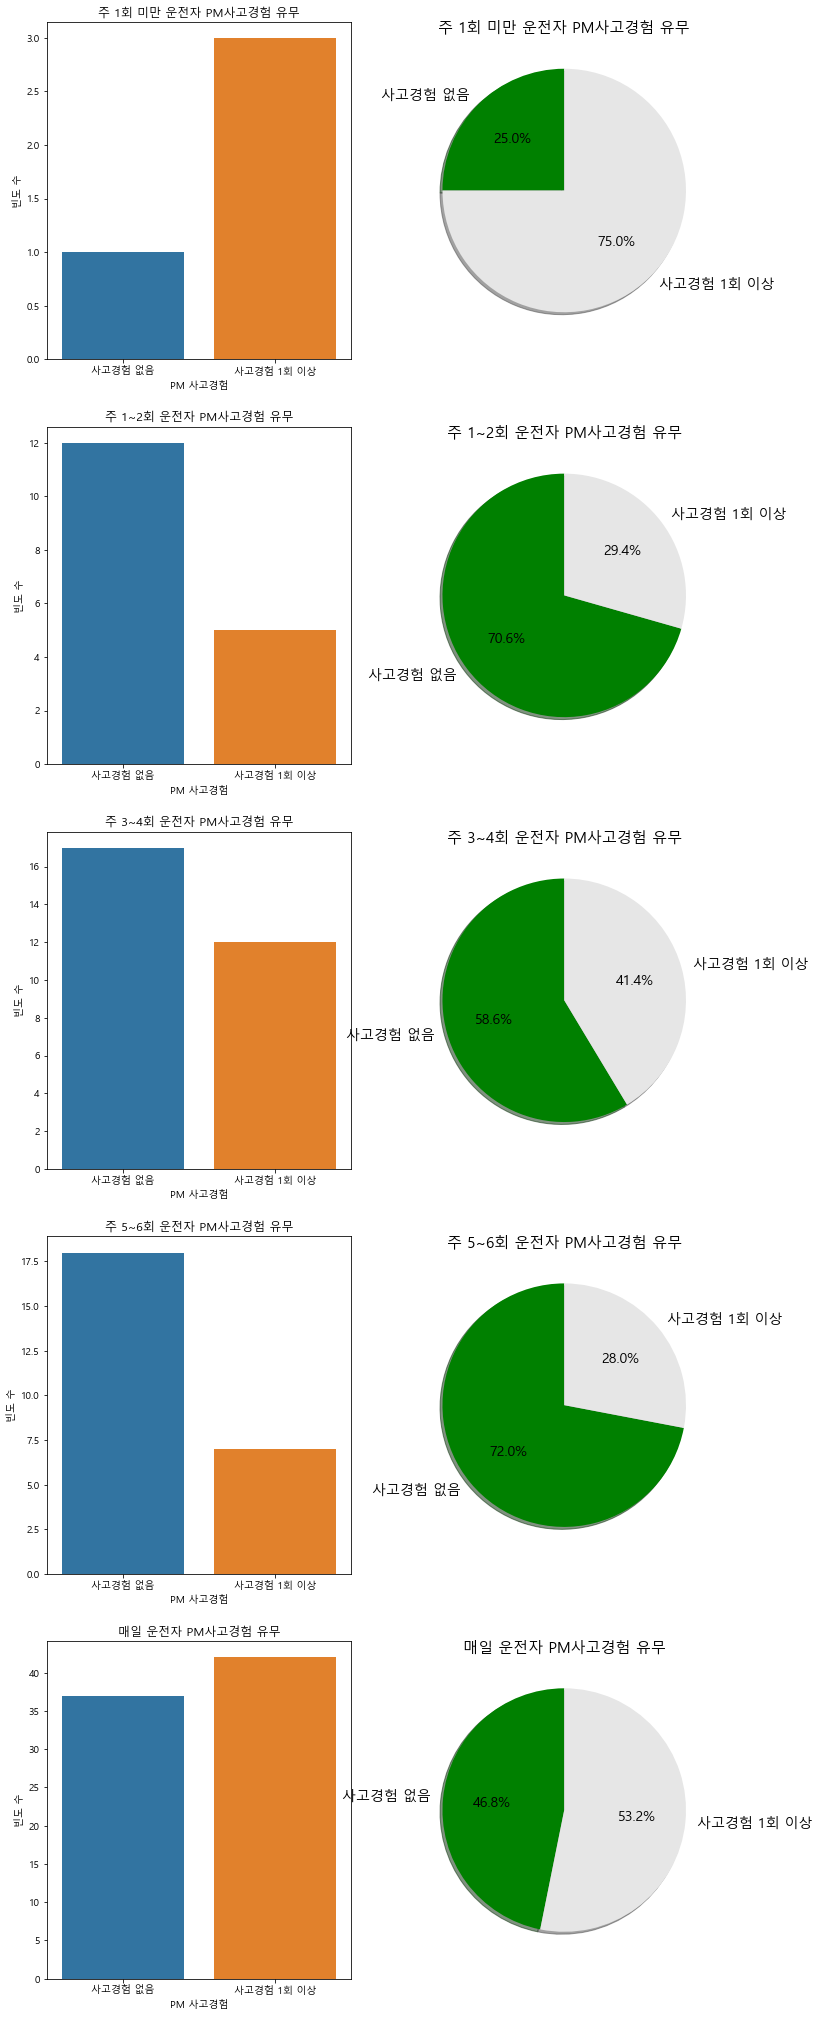

In [214]:
fig = plt.figure(figsize = (12, 36))

ax1 = fig.add_subplot(5,2,1)
ax1 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 운전횟수01['빈도 수'])
plt.title('주 1회 미만 운전자 PM사고경험 유무')
plt.xlabel('PM 사고경험')
plt.ylabel('빈도 수')

ax2 = fig.add_subplot(5,2,2)
ax2 = plt.pie(운전횟수01['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('주 1회 미만 운전자 PM사고경험 유무', fontsize = 15)

ax3 = fig.add_subplot(5,2,3)
ax3 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 운전횟수12['빈도 수'])
plt.title('주 1~2회 운전자 PM사고경험 유무')
plt.xlabel('PM 사고경험')
plt.ylabel('빈도 수')

ax4 = fig.add_subplot(5,2,4)
ax4 = plt.pie(운전횟수12['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('주 1~2회 운전자 PM사고경험 유무', fontsize = 15)

ax5 = fig.add_subplot(5,2,5)
ax5 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 운전횟수34['빈도 수'])
plt.title('주 3~4회 운전자 PM사고경험 유무')
plt.xlabel('PM 사고경험')
plt.ylabel('빈도 수')

ax6 = fig.add_subplot(5,2,6)
ax6 = plt.pie(운전횟수34['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('주 3~4회 운전자 PM사고경험 유무', fontsize = 15)


ax7 = fig.add_subplot(5,2,7)
ax7 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 운전횟수56['빈도 수'])
plt.title('주 5~6회 운전자 PM사고경험 유무')
plt.xlabel('PM 사고경험')
plt.ylabel('빈도 수')

ax8 = fig.add_subplot(5,2,8)
ax8 = plt.pie(운전횟수56['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('주 5~6회 운전자 PM사고경험 유무', fontsize = 15)

ax9 = fig.add_subplot(5,2,9)
ax9 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 운전횟수7['빈도 수'])
plt.title('매일 운전자 PM사고경험 유무')
plt.xlabel('PM 사고경험')
plt.ylabel('빈도 수')

ax10 = fig.add_subplot(5,2,10)
ax10 = plt.pie(운전횟수7['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('매일 운전자 PM사고경험 유무', fontsize = 15)
plt.show()

* 1주일 운전횟수 별 PM사고 경험 비율은, 주 1회 미만 75% , 주1~2회 29.4%, 주 3~4회 41.4%, 주 5~6회 28.0%, 매일 53.2% 로 나타났다.

#### 1주일 운전횟수별 - PM전용도로찬/반 교차분석

In [215]:
운전횟수도로찬반= pd.DataFrame(df_운전자.groupby(['1주일 운전횟수','PM전용도로찬/반'])['빈도 수'].count())
운전횟수도로찬반

빈도 수
1주일 운전횟수 PM전용도로찬/반      
1~2회     반대            6
         잘 모르겠다        3
         찬성            7
1회 미만    반대            1
         찬성            3
3~4회     반대            6
         찬성           19
5~6회     반대            4
         잘 모르겠다        1
         찬성           20
매일       반대           16
         잘 모르겠다        1
         찬성           51

In [216]:
도로찬반01 = pd.DataFrame(운전횟수도로찬반.loc[['1회 미만']])
도로찬반01 = 도로찬반01.reset_index()
도로찬반01['비율'] = 도로찬반01['빈도 수']/sum(도로찬반01['빈도 수']) * 100

도로찬반12 = pd.DataFrame(운전횟수도로찬반.loc[['1~2회']])
도로찬반12 = 도로찬반12.reset_index()
도로찬반12['비율'] = 도로찬반12['빈도 수']/sum(도로찬반12['빈도 수']) * 100

도로찬반34 = pd.DataFrame(운전횟수도로찬반.loc[['3~4회']])
도로찬반34 = 도로찬반34.reset_index()
도로찬반34['비율'] = 도로찬반34['빈도 수']/sum(도로찬반34['빈도 수']) * 100

도로찬반56 = pd.DataFrame(운전횟수도로찬반.loc[['5~6회']])
도로찬반56 = 도로찬반01.reset_index()
도로찬반56['비율'] = 도로찬반56['빈도 수']/sum(도로찬반56['빈도 수']) * 100

도로찬반7 = pd.DataFrame(운전횟수도로찬반.loc[['매일']])
도로찬반7 = 도로찬반7.reset_index()
도로찬반7['비율'] = 도로찬반7['빈도 수']/sum(도로찬반7['빈도 수']) * 100

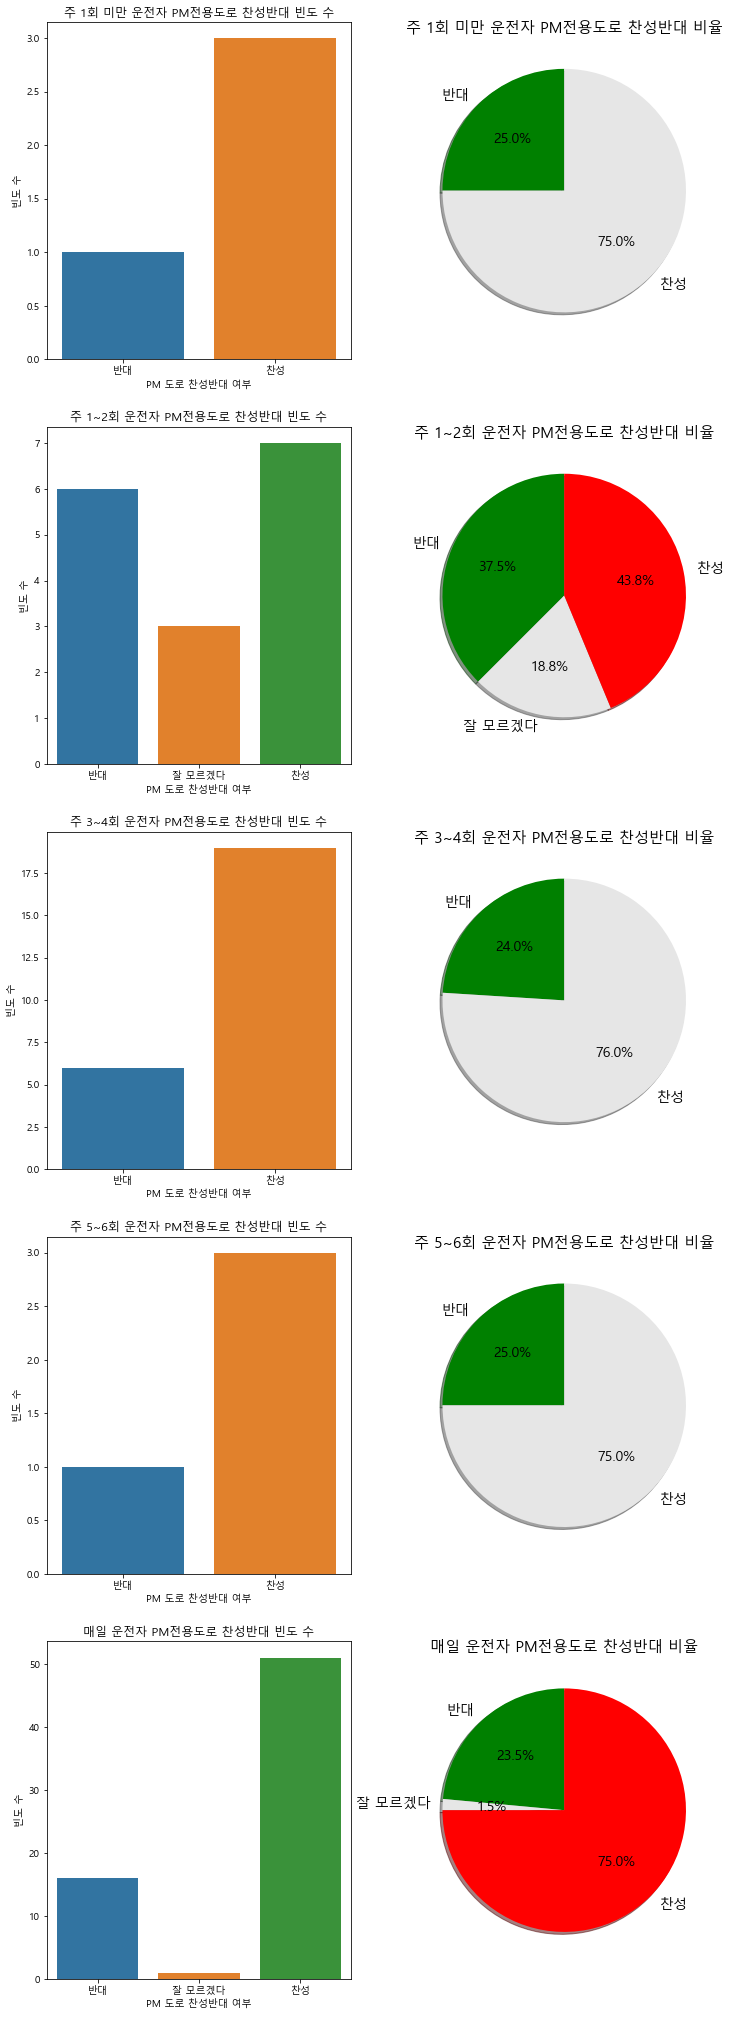

In [217]:
fig = plt.figure(figsize = (12, 36))

ax1 = fig.add_subplot(5,2,1)
ax1 = sns.barplot(x = 도로찬반01['PM전용도로찬/반'], y = 도로찬반01['빈도 수'])
plt.title('주 1회 미만 운전자 PM전용도로 찬성반대 빈도 수')
plt.xlabel('PM 도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax2 = fig.add_subplot(5,2,2)
ax2 = plt.pie(도로찬반01['비율'], labels = 도로찬반01['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('주 1회 미만 운전자 PM전용도로 찬성반대 비율', fontsize = 15)


ax3 = fig.add_subplot(5,2,3)
ax3 = sns.barplot(x = 도로찬반12['PM전용도로찬/반'], y = 도로찬반12['빈도 수'])
plt.title('주 1~2회 운전자 PM전용도로 찬성반대 빈도 수')
plt.xlabel('PM 도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax4 = fig.add_subplot(5,2,4)
ax4 = plt.pie(도로찬반12['비율'], labels = 도로찬반12['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('주 1~2회 운전자 PM전용도로 찬성반대 비율', fontsize = 15)

ax5 = fig.add_subplot(5,2,5)
ax5 = sns.barplot(x = 도로찬반34['PM전용도로찬/반'], y = 도로찬반34['빈도 수'])
plt.title('주 3~4회 운전자 PM전용도로 찬성반대 빈도 수')
plt.xlabel('PM 도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax6 = fig.add_subplot(5,2,6)
ax6 = plt.pie(도로찬반34['비율'], labels = 도로찬반34['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('주 3~4회 운전자 PM전용도로 찬성반대 비율', fontsize = 15)

ax7 = fig.add_subplot(5,2,7)
ax7 = sns.barplot(x = 도로찬반56['PM전용도로찬/반'], y = 도로찬반56['빈도 수'])
plt.title('주 5~6회 운전자 PM전용도로 찬성반대 빈도 수')
plt.xlabel('PM 도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax8 = fig.add_subplot(5,2,8)
ax8 = plt.pie(도로찬반56['비율'], labels = 도로찬반56['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('주 5~6회 운전자 PM전용도로 찬성반대 비율', fontsize = 15)

ax9 = fig.add_subplot(5,2,9)
ax9 = sns.barplot(x = 도로찬반7['PM전용도로찬/반'], y = 도로찬반7['빈도 수'])
plt.title('매일 운전자 PM전용도로 찬성반대 빈도 수')
plt.xlabel('PM 도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax10 = fig.add_subplot(5,2,10)
ax10 = plt.pie(도로찬반7['비율'], labels = 도로찬반7['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('매일 운전자 PM전용도로 찬성반대 비율', fontsize = 15)
plt.show()

* 1주일 운전횟수별 PM전용도로 찬성반대 비율은, 주 1회 미만 찬성 75% 반대 25%, 주1~2회 찬성 43.8% 반대 37.5% 잘 모르겠다 18.8%, 주 3~4회 찬성 76% 반대 24%, 주 5~6회 찬성 75% 반대 25%, 매일 찬성 75% 반대 23.5% 잘 모르겠다 1.5% 로 확인되었음.
* 주 1~2회 운전자의 경우, 찬성 반대가 비슷한 비율을 보임.

#### 1주일 운전횟수별 - PM전용도로위치 교차분석

In [218]:
운전횟수설치위치 = pd.DataFrame(df_운전자.groupby(['1주일 운전횟수','전용도로위치'])['빈도 수'].sum())
운전횟수설치위치

빈도 수
1주일 운전횟수 전용도로위치      
1~2회     기타         4
         보도(인도)     5
         차도         5
1회 미만    보도(인도)     3
         차도         1
3~4회     기타         1
         보도(인도)    12
         차도         7
5~6회     기타         6
         보도(인도)    12
         차도         6
매일       기타        12
         보도(인도)    37
         차도        14

In [219]:
도로위치_0회 = pd.DataFrame(운전횟수설치위치.loc[['1회 미만']]).reset_index()
도로위치_0회['비율'] = 도로위치_0회['빈도 수']/sum(도로위치_0회['빈도 수']) * 100
도로위치_0회

,1주일 운전횟수,전용도로위치,빈도 수,비율
0,1회 미만,보도(인도),3,75.0
1,1회 미만,차도,1,25.0


In [220]:
도로위치_2회 = pd.DataFrame(운전횟수설치위치.loc[['1~2회']]).reset_index()
도로위치_2회['비율'] = 도로위치_2회['빈도 수']/sum(도로위치_2회['빈도 수']) * 100
도로위치_2회

,1주일 운전횟수,전용도로위치,빈도 수,비율
0,1~2회,기타,4,28.571429
1,1~2회,보도(인도),5,35.714286
2,1~2회,차도,5,35.714286


In [221]:
도로위치_4회 = pd.DataFrame(운전횟수설치위치.loc[['3~4회']]).reset_index()
도로위치_4회['비율'] = 도로위치_4회['빈도 수']/sum(도로위치_4회['빈도 수']) * 100
도로위치_4회

,1주일 운전횟수,전용도로위치,빈도 수,비율
0,3~4회,기타,1,5.0
1,3~4회,보도(인도),12,60.0
2,3~4회,차도,7,35.0


In [222]:
도로위치_6회 = pd.DataFrame(운전횟수설치위치.loc[['5~6회']]).reset_index()
도로위치_6회['비율'] = 도로위치_6회['빈도 수']/sum(도로위치_6회['빈도 수']) * 100
도로위치_6회

,1주일 운전횟수,전용도로위치,빈도 수,비율
0,5~6회,기타,6,25.0
1,5~6회,보도(인도),12,50.0
2,5~6회,차도,6,25.0


In [223]:
도로위치_7회 = pd.DataFrame(운전횟수설치위치.loc[['매일']]).reset_index()
도로위치_7회['비율'] = 도로위치_7회['빈도 수']/sum(도로위치_7회['빈도 수']) * 100
도로위치_7회

,1주일 운전횟수,전용도로위치,빈도 수,비율
0,매일,기타,12,19.047619
1,매일,보도(인도),37,58.730159
2,매일,차도,14,22.222222


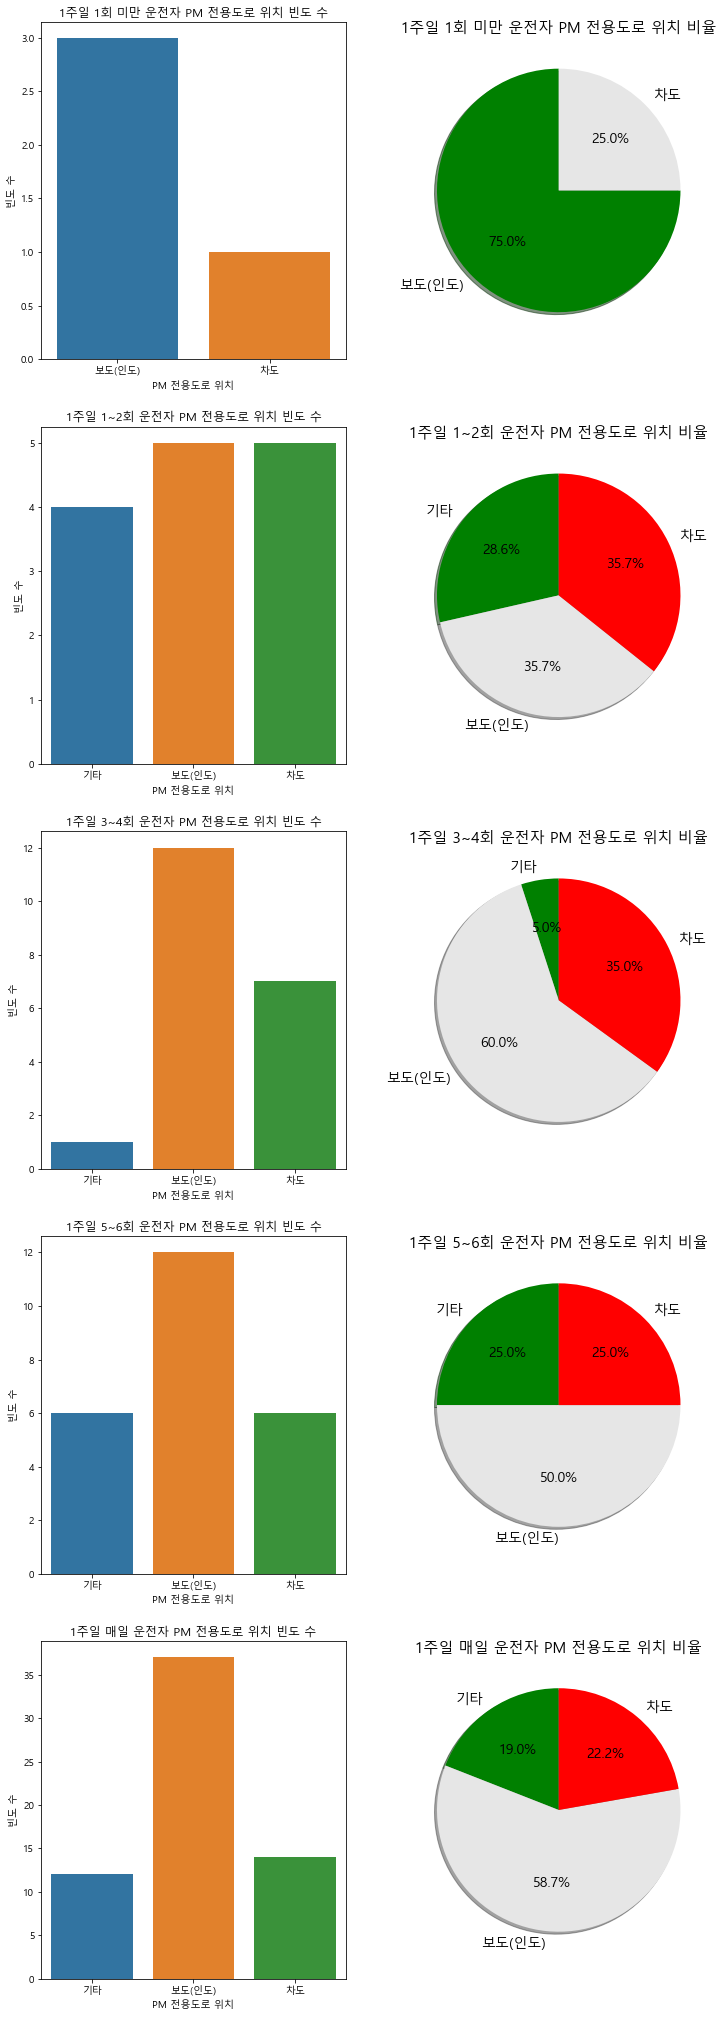

In [224]:
fig = plt.figure(figsize = (12, 36))

ax1 = fig.add_subplot(5,2,1)
ax1 = sns.barplot(x = 도로위치_0회['전용도로위치'], y = 도로위치_0회['빈도 수'])
plt.title('1주일 1회 미만 운전자 PM 전용도로 위치 빈도 수')
plt.xlabel('PM 전용도로 위치')
plt.ylabel('빈도 수')

ax2 = fig.add_subplot(5,2,2)
ax2 = plt.pie(도로위치_0회['비율'], labels = 도로위치_0회['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('1주일 1회 미만 운전자 PM 전용도로 위치 비율', fontsize = 15)

ax1 = fig.add_subplot(5,2,3)
ax1 = sns.barplot(x = 도로위치_2회['전용도로위치'], y = 도로위치_2회['빈도 수'])
plt.title('1주일 1~2회 운전자 PM 전용도로 위치 빈도 수')
plt.xlabel('PM 전용도로 위치')
plt.ylabel('빈도 수')

ax2 = fig.add_subplot(5,2,4)
ax2 = plt.pie(도로위치_2회['비율'], labels = 도로위치_2회['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('1주일 1~2회 운전자 PM 전용도로 위치 비율', fontsize = 15)

ax1 = fig.add_subplot(5,2,5)
ax1 = sns.barplot(x = 도로위치_4회['전용도로위치'], y = 도로위치_4회['빈도 수'])
plt.title('1주일 3~4회 운전자 PM 전용도로 위치 빈도 수')
plt.xlabel('PM 전용도로 위치')
plt.ylabel('빈도 수')

ax1 = fig.add_subplot(5,2,6)
ax1 = plt.pie(도로위치_4회['비율'], labels = 도로위치_4회['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('1주일 3~4회 운전자 PM 전용도로 위치 비율', fontsize = 15)

ax1 = fig.add_subplot(5,2,7)
ax1 = sns.barplot(x = 도로위치_6회['전용도로위치'], y = 도로위치_6회['빈도 수'])
plt.title('1주일 5~6회 운전자 PM 전용도로 위치 빈도 수')
plt.xlabel('PM 전용도로 위치')
plt.ylabel('빈도 수')

ax1 = fig.add_subplot(5,2,8)
ax1 = plt.pie(도로위치_6회['비율'], labels = 도로위치_6회['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('1주일 5~6회 운전자 PM 전용도로 위치 비율', fontsize = 15)

ax1 = fig.add_subplot(5,2,9)
ax1 = sns.barplot(x = 도로위치_7회['전용도로위치'], y = 도로위치_7회['빈도 수'])
plt.title('1주일 매일 운전자 PM 전용도로 위치 빈도 수')
plt.xlabel('PM 전용도로 위치')
plt.ylabel('빈도 수')

ax1 = fig.add_subplot(5,2,10)
ax1 = plt.pie(도로위치_7회['비율'], labels = 도로위치_7회['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
        shadow = True, startangle = 90)
plt.title('1주일 매일 운전자 PM 전용도로 위치 비율', fontsize = 15)

plt.show()

* 1주일 1회 미만 운전자 PM전용도로 위치 선호는 보도(인도) 75%, 차도 25% 로 확인되었음.
* 1주일 1~2회 운전자 PM전용도로 위치 선호는 보도(인도) 35.7%, 차도 35.7%, 기타 28.6% 로 확인되었음.
* 1주일 3~4회 운전자 PM전용도로 위치 선호는 보도(인도) 60.0%, 차도 35.0%, 기타 5.0% 로 확인되었음.
* 1주일 5~6회 운전자 PM전용도로 위치 선호는 보도(인도) 50.0%, 차도 25.0%, 기타 25.0% 로 확인되었음.
* 1주일 매일 운전자 PM전용도로 위치 선호는 보도(인도) 58.7%, 차도 22.2%, 기타 19.0% 로 확인되었음.

#### 1년 평균 주행거리별- 사고 교차분석

In [225]:
# 1년평균주행거리 - 사고 경험 (유의미한 결과는 없어보임)

In [226]:
주행거리사고경험 = pd.DataFrame(df_운전자.groupby(['1년평균주행거리','PM사고경험'])['빈도 수'].count())
주행거리사고경험

빈도 수
1년평균주행거리 PM사고경험      
1만km 미만  0         23
         1         30
1만~2만km  0         27
         1         13
2만~3만km  0         20
         1         11
3만~4만km  0          5
         1          6
4만~5만km  0          2
         1          3
5만km 이상  0          8
         1          6

In [227]:
주행거리01 = pd.DataFrame(주행거리사고경험.loc[['1만km 미만']]).reset_index()
주행거리01['비율'] = 주행거리01['빈도 수']/sum(주행거리01['빈도 수']) * 100
주행거리01

,1년평균주행거리,PM사고경험,빈도 수,비율
0,1만km 미만,0,23,43.396226
1,1만km 미만,1,30,56.603774


In [228]:
주행거리12 = pd.DataFrame(주행거리사고경험.loc[['1만~2만km']]).reset_index()
주행거리12['비율'] = 주행거리12['빈도 수']/sum(주행거리12['빈도 수']) * 100
주행거리12

,1년평균주행거리,PM사고경험,빈도 수,비율
0,1만~2만km,0,27,67.5
1,1만~2만km,1,13,32.5


In [229]:
주행거리23 = pd.DataFrame(주행거리사고경험.loc[['2만~3만km']]).reset_index()
주행거리23['비율'] = 주행거리23['빈도 수']/sum(주행거리23['빈도 수']) * 100
주행거리23

,1년평균주행거리,PM사고경험,빈도 수,비율
0,2만~3만km,0,20,64.516129
1,2만~3만km,1,11,35.483871


In [230]:
주행거리34 = pd.DataFrame(주행거리사고경험.loc[['3만~4만km']]).reset_index()
주행거리34['비율'] = 주행거리34['빈도 수']/sum(주행거리34['빈도 수']) * 100
주행거리34

,1년평균주행거리,PM사고경험,빈도 수,비율
0,3만~4만km,0,5,45.454545
1,3만~4만km,1,6,54.545455


In [231]:
주행거리45 = pd.DataFrame(주행거리사고경험.loc[['4만~5만km']]).reset_index()
주행거리45['비율'] = 주행거리45['빈도 수']/sum(주행거리45['빈도 수']) * 100
주행거리45

,1년평균주행거리,PM사고경험,빈도 수,비율
0,4만~5만km,0,2,40.0
1,4만~5만km,1,3,60.0


In [232]:
주행거리5이상 = pd.DataFrame(주행거리사고경험.loc[['5만km 이상']]).reset_index()
주행거리5이상['비율'] = 주행거리5이상['빈도 수']/sum(주행거리5이상['빈도 수']) * 100
주행거리5이상

,1년평균주행거리,PM사고경험,빈도 수,비율
0,5만km 이상,0,8,57.142857
1,5만km 이상,1,6,42.857143


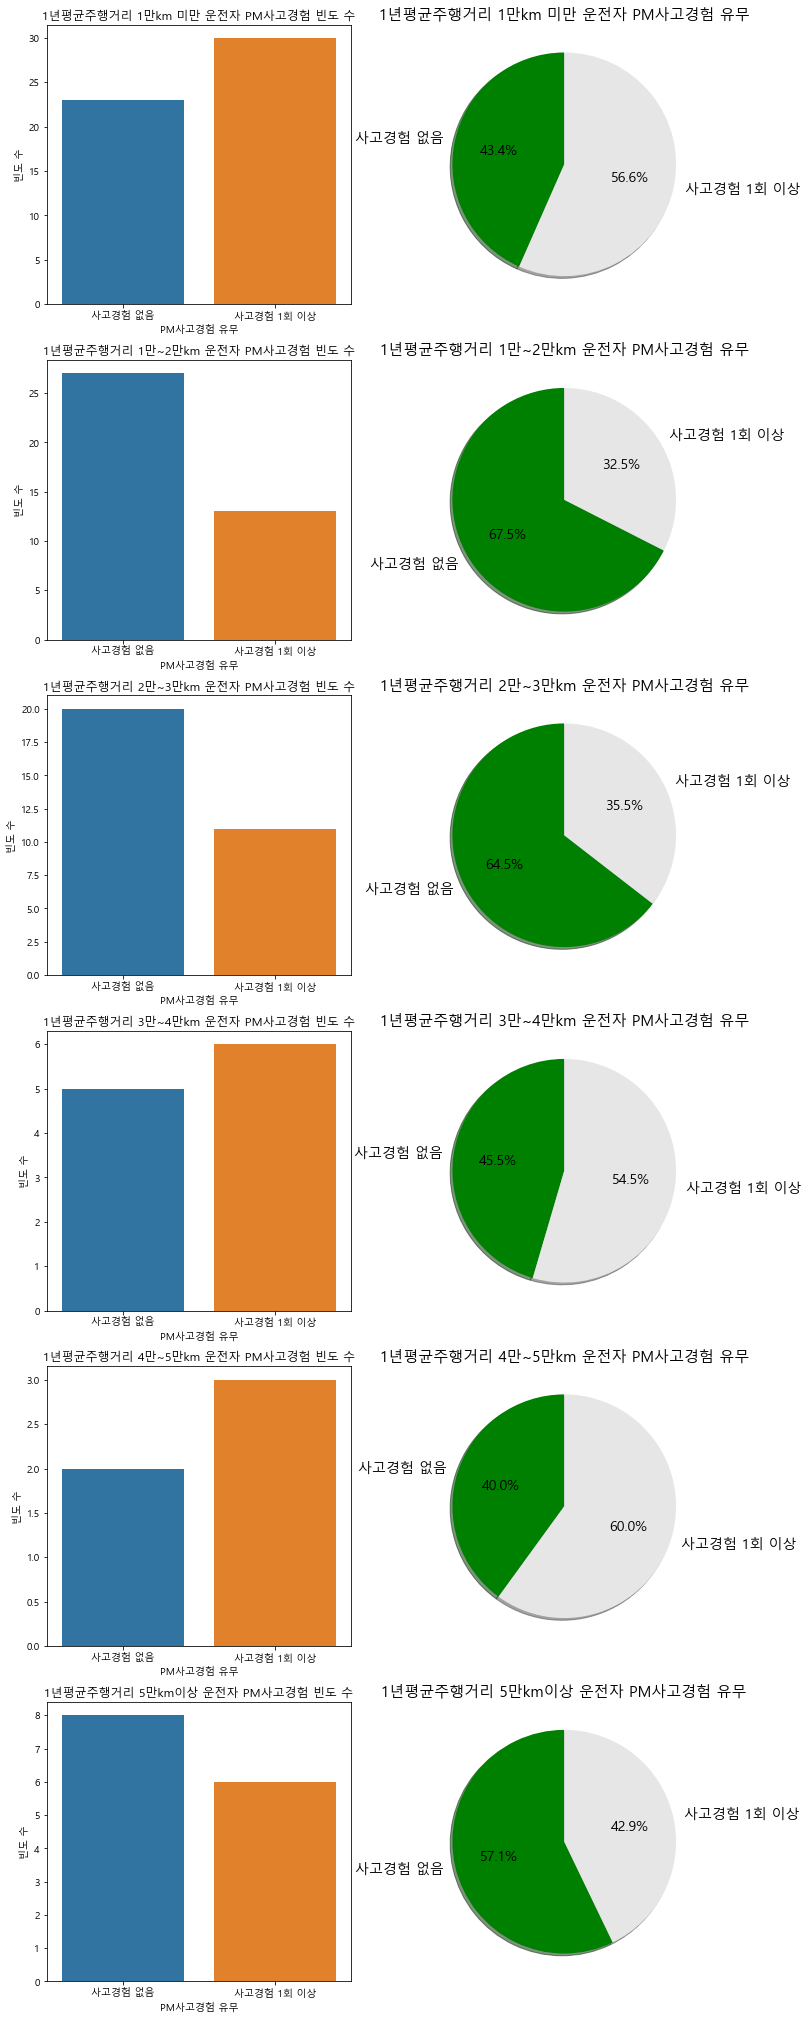

In [233]:
fig = plt.figure(figsize = (12, 36))

ax1 = fig.add_subplot(6,2,1)
ax1 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 주행거리01['빈도 수'])
plt.title('1년평균주행거리 1만km 미만 운전자 PM사고경험 빈도 수')
plt.xlabel('PM사고경험 유무')
plt.ylabel('빈도 수')

ax2 = fig.add_subplot(6,2,2)
ax2 = plt.pie(주행거리01['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 1만km 미만 운전자 PM사고경험 유무', fontsize = 15)

ax3 = fig.add_subplot(6,2,3)
ax3 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 주행거리12['빈도 수'])
plt.title('1년평균주행거리 1만~2만km 운전자 PM사고경험 빈도 수')
plt.xlabel('PM사고경험 유무')
plt.ylabel('빈도 수')

ax4 = fig.add_subplot(6,2,4)
ax4 = plt.pie(주행거리12['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 1만~2만km 운전자 PM사고경험 유무', fontsize = 15)

ax5 = fig.add_subplot(6,2,5)
ax5 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 주행거리23['빈도 수'])
plt.title('1년평균주행거리 2만~3만km 운전자 PM사고경험 빈도 수')
plt.xlabel('PM사고경험 유무')
plt.ylabel('빈도 수')

ax6 = fig.add_subplot(6,2,6)
ax6 = plt.pie(주행거리23['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 2만~3만km 운전자 PM사고경험 유무', fontsize = 15)

ax7 = fig.add_subplot(6,2,7)
ax7 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 주행거리34['빈도 수'])
plt.title('1년평균주행거리 3만~4만km 운전자 PM사고경험 빈도 수')
plt.xlabel('PM사고경험 유무')
plt.ylabel('빈도 수')

ax8 = fig.add_subplot(6,2,8)
ax8 = plt.pie(주행거리34['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 3만~4만km 운전자 PM사고경험 유무', fontsize = 15)

ax9 = fig.add_subplot(6,2,9)
ax9 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 주행거리45['빈도 수'])
plt.title('1년평균주행거리 4만~5만km 운전자 PM사고경험 빈도 수')
plt.xlabel('PM사고경험 유무')
plt.ylabel('빈도 수')

ax10 = fig.add_subplot(6,2,10)
ax10 = plt.pie(주행거리45['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 4만~5만km 운전자 PM사고경험 유무', fontsize = 15)

ax11 = fig.add_subplot(6,2,11)
ax11 = sns.barplot(x = ['사고경험 없음','사고경험 1회 이상'], y = 주행거리5이상['빈도 수'])
plt.title('1년평균주행거리 5만km이상 운전자 PM사고경험 빈도 수')
plt.xlabel('PM사고경험 유무')
plt.ylabel('빈도 수')

ax12 = fig.add_subplot(6,2,12)
ax12 = plt.pie(주행거리5이상['비율'], labels = ['사고경험 없음','사고경험 1회 이상'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 5만km이상 운전자 PM사고경험 유무', fontsize = 15)
plt.show()

* 1년 평균주행거리별 운전자 PM사고 경험비율은 1만km 미만 56.6%, 1만~2만km 32.5%, 2만~3만km 35.5%, 3만~4만km 54.5%, 4만~5만km 60.0%, 5만km 이상 42.9% 로 확인되었음

#### 1년 평균 주행거리별 - PM전용도로찬/반 교차분석

In [234]:
주행거리도로찬반 = pd.DataFrame(df_운전자.groupby(['1년평균주행거리','PM전용도로찬/반'])['빈도 수'].count())
주행거리도로찬반

빈도 수
1년평균주행거리 PM전용도로찬/반      
1만km 미만  반대           11
         잘 모르겠다        4
         찬성           30
1만~2만km  반대            8
         찬성           30
2만~3만km  반대            7
         찬성           21
3만~4만km  반대            4
         찬성            5
4만~5만km  찬성            5
5만km 이상  반대            3
         잘 모르겠다        1
         찬성            9

In [235]:
도로찬반01 = pd.DataFrame(주행거리도로찬반.loc[['1만km 미만']]).reset_index()
도로찬반01['비율'] = 도로찬반01['빈도 수']/sum(도로찬반01['빈도 수']) * 100
도로찬반01

,1년평균주행거리,PM전용도로찬/반,빈도 수,비율
0,1만km 미만,반대,11,24.444444
1,1만km 미만,잘 모르겠다,4,8.888889
2,1만km 미만,찬성,30,66.666667


In [236]:
도로찬반12 = pd.DataFrame(주행거리도로찬반.loc[['1만~2만km']]).reset_index()
도로찬반12['비율'] = 도로찬반12['빈도 수']/sum(도로찬반12['빈도 수']) * 100
도로찬반12

,1년평균주행거리,PM전용도로찬/반,빈도 수,비율
0,1만~2만km,반대,8,21.052632
1,1만~2만km,찬성,30,78.947368


In [237]:
도로찬반23 = pd.DataFrame(주행거리도로찬반.loc[['2만~3만km']]).reset_index()
도로찬반23['비율'] = 도로찬반23['빈도 수']/sum(도로찬반23['빈도 수']) * 100
도로찬반23

,1년평균주행거리,PM전용도로찬/반,빈도 수,비율
0,2만~3만km,반대,7,25.0
1,2만~3만km,찬성,21,75.0


In [238]:
도로찬반34 = pd.DataFrame(주행거리도로찬반.loc[['3만~4만km']]).reset_index()
도로찬반34['비율'] = 도로찬반34['빈도 수']/sum(도로찬반34['빈도 수']) * 100
도로찬반34

,1년평균주행거리,PM전용도로찬/반,빈도 수,비율
0,3만~4만km,반대,4,44.444444
1,3만~4만km,찬성,5,55.555556


In [239]:
도로찬반45 = pd.DataFrame(주행거리도로찬반.loc[['4만~5만km']]).reset_index()
도로찬반45['비율'] = 도로찬반45['빈도 수']/sum(도로찬반45['빈도 수']) * 100
도로찬반45

,1년평균주행거리,PM전용도로찬/반,빈도 수,비율
0,4만~5만km,찬성,5,100.0


In [240]:
도로찬반5이상 = pd.DataFrame(주행거리도로찬반.loc[['5만km 이상']]).reset_index()
도로찬반5이상['비율'] = 도로찬반5이상['빈도 수']/sum(도로찬반5이상['빈도 수']) * 100
도로찬반5이상

,1년평균주행거리,PM전용도로찬/반,빈도 수,비율
0,5만km 이상,반대,3,23.076923
1,5만km 이상,잘 모르겠다,1,7.692308
2,5만km 이상,찬성,9,69.230769


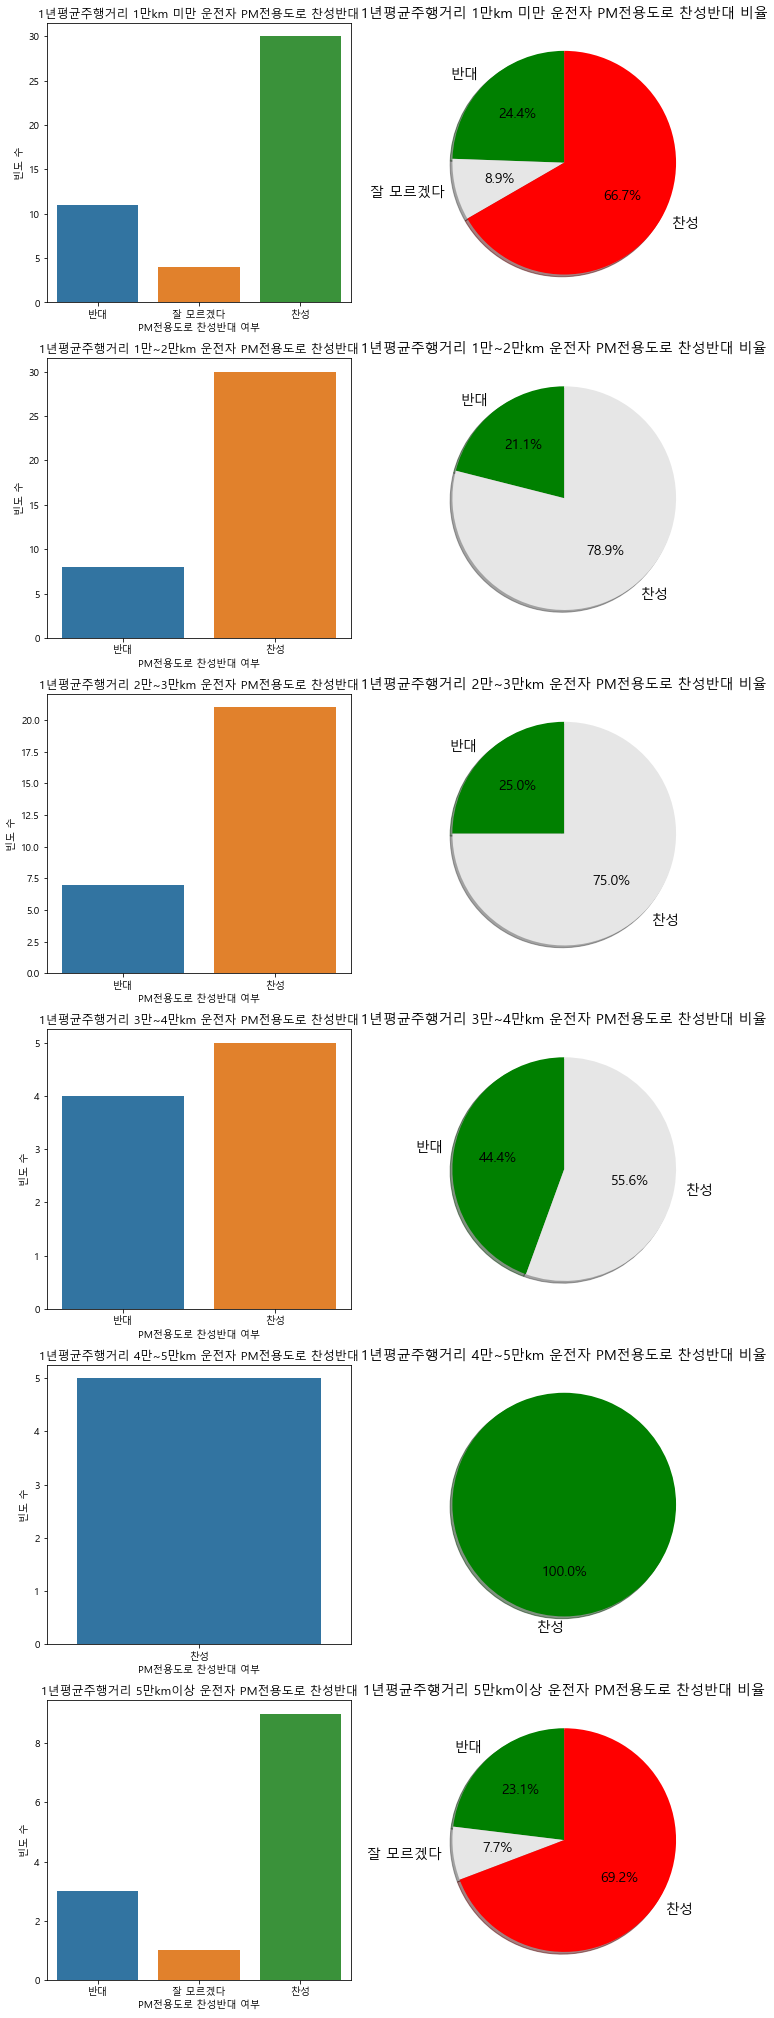

In [241]:
fig = plt.figure(figsize = (12, 36))

ax1 = fig.add_subplot(6,2,1)
ax1 = sns.barplot(x = 도로찬반01['PM전용도로찬/반'], y = 도로찬반01['빈도 수'])
plt.title('1년평균주행거리 1만km 미만 운전자 PM전용도로 찬성반대')
plt.xlabel('PM전용도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax2 = fig.add_subplot(6,2,2)
ax2 = plt.pie(도로찬반01['비율'], labels = 도로찬반01['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 1만km 미만 운전자 PM전용도로 찬성반대 비율', fontsize = 14)

ax3 = fig.add_subplot(6,2,3)
ax3 =sns.barplot(x = 도로찬반12['PM전용도로찬/반'], y = 도로찬반12['빈도 수'])
plt.title('1년평균주행거리 1만~2만km 운전자 PM전용도로 찬성반대')
plt.xlabel('PM전용도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax4 = fig.add_subplot(6,2,4)
ax4 = plt.pie(도로찬반12['비율'], labels = 도로찬반12['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 1만~2만km 운전자 PM전용도로 찬성반대 비율', fontsize = 14)

ax5 = fig.add_subplot(6,2,5)
ax5 = sns.barplot(x = 도로찬반23['PM전용도로찬/반'], y = 도로찬반23['빈도 수'])
plt.title('1년평균주행거리 2만~3만km 운전자 PM전용도로 찬성반대')
plt.xlabel('PM전용도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax6 = fig.add_subplot(6,2,6)
ax6 = plt.pie(도로찬반23['비율'], labels = 도로찬반23['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 2만~3만km 운전자 PM전용도로 찬성반대 비율', fontsize = 14)

ax7 = fig.add_subplot(6,2,7)
ax7 = sns.barplot(x = 도로찬반34['PM전용도로찬/반'], y = 도로찬반34['빈도 수'])
plt.title('1년평균주행거리 3만~4만km 운전자 PM전용도로 찬성반대')
plt.xlabel('PM전용도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax8 = fig.add_subplot(6,2,8)
ax8 = plt.pie(도로찬반34['비율'], labels = 도로찬반34['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 3만~4만km 운전자 PM전용도로 찬성반대 비율', fontsize = 14)

ax9 = fig.add_subplot(6,2,9)
ax9 = sns.barplot(x = 도로찬반45['PM전용도로찬/반'], y = 도로찬반45['빈도 수'])
plt.title('1년평균주행거리 4만~5만km 운전자 PM전용도로 찬성반대')
plt.xlabel('PM전용도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax10 = fig.add_subplot(6,2,10)
ax10 = plt.pie(도로찬반45['비율'], labels = 도로찬반45['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 4만~5만km 운전자 PM전용도로 찬성반대 비율', fontsize = 14)

ax11 = fig.add_subplot(6,2,11)
ax11 = sns.barplot(x = 도로찬반5이상['PM전용도로찬/반'], y = 도로찬반5이상['빈도 수'])
plt.title('1년평균주행거리 5만km이상 운전자 PM전용도로 찬성반대')
plt.xlabel('PM전용도로 찬성반대 여부')
plt.ylabel('빈도 수')

ax12 = fig.add_subplot(6,2,12)
ax12 = plt.pie(도로찬반5이상['비율'], labels = 도로찬반5이상['PM전용도로찬/반'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 5만km이상 운전자 PM전용도로 찬성반대 비율', fontsize = 14)
plt.show()

* 1년 평균 주행거리 1만km 미만 운전자 PM전용도로 찬성반대 비율은, 찬성 66.7% 반대 24.4% 잘 모르겠다 8.9% 로 나타났음.
* 1년 평균 주행거리 1만~2만km 운전자 PM전용도로 찬성반대 비율은, 찬성 78.9% 반대 21.1% 으로 나타났음.
* 1년 평균 주행거리 2만~3만km 운전자 PM전용도로 찬성반대 비율은, 찬성 75.0% 반대 25.0% 으로 나타났음.
* 1년 평균 주행거리 3만~4만km 운전자 PM전용도로 찬성반대 비율은, 찬성 55.6% 반대 44.4% 으로 나타났음.
* 1년 평균 주행거리 4만~5만km 운전자 PM전용도로 찬성반대 비율은, 찬성 100.0% 으로 나타났음.
* 1년 평균 주행거리 5만km 이상 운전자 PM전용도로 찬성반대 비율은, 찬성 69.2% 반대 23.1% 잘 모르겠다 7.7% 로 나타났음.

#### 1년 평균 주행거리별 - PM전용도로 설치위치 교차분석

In [242]:
주행거리도로위치 = pd.DataFrame(df_운전자.groupby(['1년평균주행거리','전용도로위치'])['빈도 수'].sum())
주행거리도로위치

빈도 수
1년평균주행거리 전용도로위치      
1만km 미만  기타         5
         보도(인도)    21
         차도        15
1만~2만km  기타         8
         보도(인도)    19
         차도         9
2만~3만km  기타         5
         보도(인도)    17
         차도         4
3만~4만km  기타         2
         보도(인도)     4
         차도         2
4만~5만km  기타         1
         보도(인도)     2
         차도         1
5만km 이상  기타         2
         보도(인도)     6
         차도         2

In [243]:
도로위치01 = pd.DataFrame(주행거리도로위치.loc[['1만km 미만']]).reset_index()
도로위치01['비율'] = 도로위치01['빈도 수']/sum(도로위치01['빈도 수']) * 100
도로위치01

,1년평균주행거리,전용도로위치,빈도 수,비율
0,1만km 미만,기타,5,12.195122
1,1만km 미만,보도(인도),21,51.219512
2,1만km 미만,차도,15,36.585366


In [244]:
도로위치12 = pd.DataFrame(주행거리도로위치.loc[['1만~2만km']]).reset_index()
도로위치12['비율'] = 도로위치12['빈도 수']/sum(도로위치12['빈도 수']) * 100
도로위치12

,1년평균주행거리,전용도로위치,빈도 수,비율
0,1만~2만km,기타,8,22.222222
1,1만~2만km,보도(인도),19,52.777778
2,1만~2만km,차도,9,25.000000


In [245]:
도로위치23 = pd.DataFrame(주행거리도로위치.loc[['2만~3만km']]).reset_index()
도로위치23['비율'] = 도로위치23['빈도 수']/sum(도로위치23['빈도 수']) * 100
도로위치23

,1년평균주행거리,전용도로위치,빈도 수,비율
0,2만~3만km,기타,5,19.230769
1,2만~3만km,보도(인도),17,65.384615
2,2만~3만km,차도,4,15.384615


In [246]:
도로위치34 = pd.DataFrame(주행거리도로위치.loc[['3만~4만km']]).reset_index()
도로위치34['비율'] = 도로위치34['빈도 수']/sum(도로위치34['빈도 수']) * 100
도로위치34

,1년평균주행거리,전용도로위치,빈도 수,비율
0,3만~4만km,기타,2,25.0
1,3만~4만km,보도(인도),4,50.0
2,3만~4만km,차도,2,25.0


In [247]:
도로위치45 = pd.DataFrame(주행거리도로위치.loc[['4만~5만km']]).reset_index()
도로위치45['비율'] = 도로위치45['빈도 수']/sum(도로위치45['빈도 수']) * 100
도로위치45

,1년평균주행거리,전용도로위치,빈도 수,비율
0,4만~5만km,기타,1,25.0
1,4만~5만km,보도(인도),2,50.0
2,4만~5만km,차도,1,25.0


In [248]:
도로위치5이상 = pd.DataFrame(주행거리도로위치.loc[['5만km 이상']]).reset_index()
도로위치5이상['비율'] = 도로위치5이상['빈도 수']/sum(도로위치5이상['빈도 수']) * 100
도로위치5이상

,1년평균주행거리,전용도로위치,빈도 수,비율
0,5만km 이상,기타,2,20.0
1,5만km 이상,보도(인도),6,60.0
2,5만km 이상,차도,2,20.0


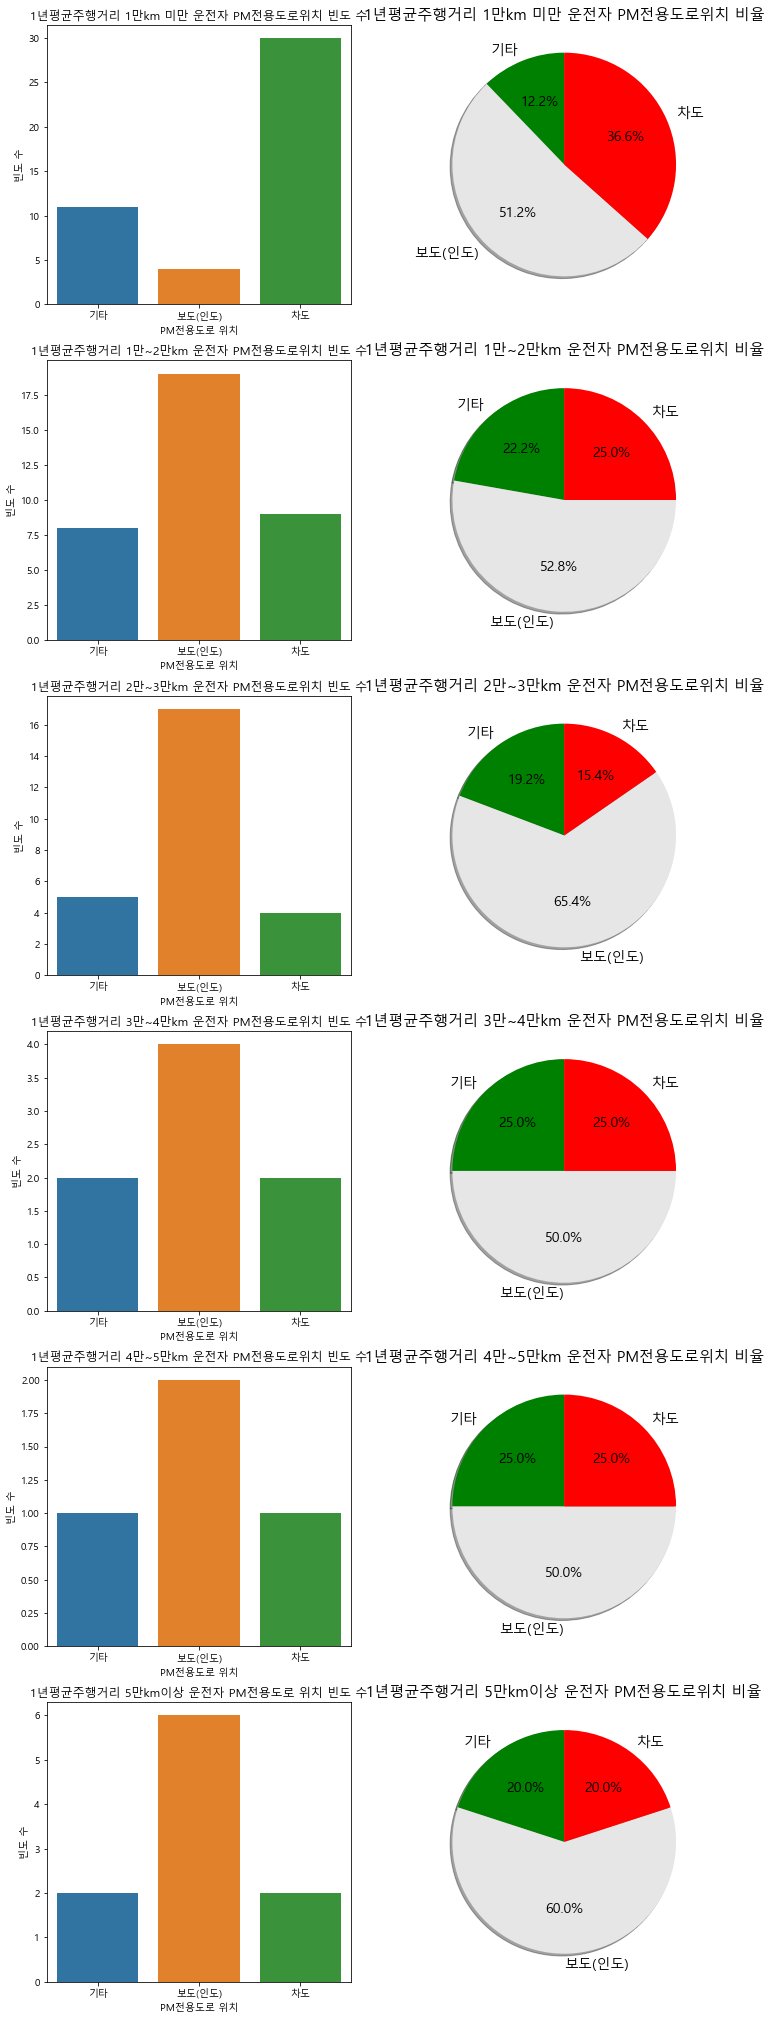

In [249]:
fig = plt.figure(figsize = (12, 36))

ax1 = fig.add_subplot(6,2,1)
ax1 = sns.barplot(x = 도로위치01['전용도로위치'], y = 도로찬반01['빈도 수'])
plt.title('1년평균주행거리 1만km 미만 운전자 PM전용도로위치 빈도 수')
plt.xlabel('PM전용도로 위치')
plt.ylabel('빈도 수')

ax2 = fig.add_subplot(6,2,2)
ax2 = plt.pie(도로위치01['비율'], labels = 도로위치01['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 1만km 미만 운전자 PM전용도로위치 비율', fontsize = 15)

ax3 = fig.add_subplot(6,2,3)
ax3 =sns.barplot(x = 도로위치12['전용도로위치'], y = 도로위치12['빈도 수'])
plt.title('1년평균주행거리 1만~2만km 운전자 PM전용도로위치 빈도 수')
plt.xlabel('PM전용도로 위치')
plt.ylabel('빈도 수')

ax4 = fig.add_subplot(6,2,4)
ax4 = plt.pie(도로위치12['비율'], labels = 도로위치12['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 1만~2만km 운전자 PM전용도로위치 비율', fontsize = 15)

ax5 = fig.add_subplot(6,2,5)
ax5 = sns.barplot(x = 도로위치23['전용도로위치'], y = 도로위치23['빈도 수'])
plt.title('1년평균주행거리 2만~3만km 운전자 PM전용도로위치 빈도 수')
plt.xlabel('PM전용도로 위치')
plt.ylabel('빈도 수')

ax6 = fig.add_subplot(6,2,6)
ax6 = plt.pie(도로위치23['비율'], labels = 도로위치23['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 2만~3만km 운전자 PM전용도로위치 비율', fontsize = 15)

ax7 = fig.add_subplot(6,2,7)
ax7 = sns.barplot(x = 도로위치34['전용도로위치'], y = 도로위치34['빈도 수'])
plt.title('1년평균주행거리 3만~4만km 운전자 PM전용도로위치 빈도 수')
plt.xlabel('PM전용도로 위치')
plt.ylabel('빈도 수')

ax8 = fig.add_subplot(6,2,8)
ax8 = plt.pie(도로위치34['비율'], labels = 도로위치34['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 3만~4만km 운전자 PM전용도로위치 비율', fontsize = 15)

ax9 = fig.add_subplot(6,2,9)
ax9 = sns.barplot(x = 도로위치45['전용도로위치'], y = 도로위치45['빈도 수'])
plt.title('1년평균주행거리 4만~5만km 운전자 PM전용도로위치 빈도 수')
plt.xlabel('PM전용도로 위치')
plt.ylabel('빈도 수')

ax10 = fig.add_subplot(6,2,10)
ax10 = plt.pie(도로위치45['비율'], labels = 도로위치45['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 4만~5만km 운전자 PM전용도로위치 비율', fontsize = 15)

ax11 = fig.add_subplot(6,2,11)
ax11 = sns.barplot(x = 도로위치5이상['전용도로위치'], y = 도로위치5이상['빈도 수'])
plt.title('1년평균주행거리 5만km이상 운전자 PM전용도로 위치 빈도 수')
plt.xlabel('PM전용도로 위치')
plt.ylabel('빈도 수')

ax12 = fig.add_subplot(6,2,12)
ax12 = plt.pie(도로위치5이상['비율'], labels = 도로위치5이상['전용도로위치'],
              autopct = "%1.1f%%", colors = ['green' ,(0.9, 0.9, 0.9),'red'], textprops = {'fontsize' : 14},
              shadow = True, startangle = 90)
plt.title('1년평균주행거리 5만km이상 운전자 PM전용도로위치 비율', fontsize = 15)
plt.show()

* 1년 평균주행거리 1만km미만 운전자 PM 전용도로 위치 선호 비율은 보도(인도) 51.2%, 차도 36.6%, 기타 12.2% 순으로 확인되었음.
* 1년 평균주행거리 1만~2만km 운전자 PM 전용도로 위치 선호 비율은 보도(인도) 52.8%, 차도 25.0%, 기타 22.2% 순으로 확인되었음.
* 1년 평균주행거리 2만~3만km 운전자 PM 전용도로 위치 선호 비율은 보도(인도) 65.4%, 기타 19.2%, 차도 15.4% 순으로 확인되었음.
* 1년 평균주행거리 3만~4만km 운전자 PM 전용도로 위치 선호 비율은 보도(인도) 50.0%, 차도 25.0%, 기타 25.0% 순으로 확인되었음.
* 1년 평균주행거리 4만~5만km 운전자 PM 전용도로 위치 선호 비율은 보도(인도) 50.0%, 차도 25.0%, 기타 25.0% 순으로 확인되었음.
* 1년 평균주행거리 5만km이상 운전자 PM 전용도로 위치 선호 비율은 보도(인도) 60.0%, 차도 20.0%, 기타 20.0% 순으로 확인되었음.